# **üè† Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä Baseline code**
> Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä ÏòàÏ∏° ÎåÄÌöåÏóê Ïò§Ïã† Ïó¨Îü¨Î∂Ñ ÌôòÏòÅÌï©ÎãàÎã§! üéâ     
> ÏïÑÎûò baselineÏóêÏÑúÎäî RandomForestÎ•º ÌôúÏö©Ìï¥ ML Î∞©Î≤ïÎ°†Îì§ÏùÑ Ïã§Ï†ú ÎåÄÌöåÏóê Ï†ÅÏö©Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
> Í∞ïÏùòÎäî google colabÏúºÎ°ú Ïã§ÌñâÌïòÏòÄÍ∏∞Ïóê ÏïÑÎûòÏùò Î≤†Ïù¥Ïä§ÎùºÏù∏ ÏΩîÎìúÏôÄÎäî ÏùºÎ∂Ä Ï∞®Ïù¥Í∞Ä ÏûàÏùÑ Ïàò ÏûàÏäµÎãàÎã§. 

## Contents
- Library Import
- Data Load
- Data Preprocessing
- Feature Engineering
- Model Training
- Inference
- Output File Save


## 1. Library Import
- ÌïÑÏöîÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Î∂àÎü¨ÏòµÎãàÎã§.

In [1]:
!pip install eli5==0.13.0
!pip install xgboost

# ÌïúÍ∏Ä Ìè∞Ìä∏ ÏÇ¨Ïö©ÏùÑ ÏúÑÌïú ÎùºÏù¥Î∏åÎü¨Î¶¨ÏûÖÎãàÎã§.
!apt-get install -y fonts-nanum

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 54 not upgraded.


In [2]:
# visualization
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
fe = fm.FontEntry(
    fname=r'/usr/share/fonts/truetype/nanum/NanumGothic.ttf', # ttf ÌååÏùºÏù¥ Ï†ÄÏû•ÎêòÏñ¥ ÏûàÎäî Í≤ΩÎ°ú
    name='NanumBarunGothic')                        # Ïù¥ Ìè∞Ìä∏Ïùò ÏõêÌïòÎäî Ïù¥Î¶Ñ ÏÑ§Ï†ï
fm.fontManager.ttflist.insert(0, fe)              # MatplotlibÏóê Ìè∞Ìä∏ Ï∂îÍ∞Ä
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumBarunGothic'}) # Ìè∞Ìä∏ ÏÑ§Ï†ï
plt.rc('font', family='NanumBarunGothic')
import seaborn as sns

# utils
import pandas as pd
import numpy as np
from tqdm import tqdm
import pickle
import warnings;warnings.filterwarnings('ignore')

# Model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV

import eli5
from eli5.sklearn import PermutationImportance

## 2. Data Load

#### 2.1. Îç∞Ïù¥ÌÑ∞ Î°úÎìú

In [3]:
# ÌïÑÏöîÌïú Îç∞Ïù¥ÌÑ∞Î•º load ÌïòÍ≤†ÏäµÎãàÎã§. Í≤ΩÎ°úÎäî ÌôòÍ≤ΩÏóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï£ºÎ©¥ Îê©ÎãàÎã§.
train_path = '/data/ephemeral/home/data/train.csv'
test_path  = '/data/ephemeral/home/data/test.csv'
dt = pd.read_csv(train_path)
dt_test = pd.read_csv(test_path)

In [4]:
# Train dataÏôÄ Test data shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('Train data shape : ', dt.shape, 'Test data shape : ', dt_test.shape)

Train data shape :  (1118822, 52) Test data shape :  (9272, 51)


In [5]:
# TrainÍ≥º Test dataÎ•º ÏÇ¥Ìé¥Î≥¥Í≤†ÏäµÎãàÎã§.
display(dt.head(1))
display(dt_test.head(1))      # Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞Ä(=Target) columnÏù¥ Ï†úÏô∏Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  201712    8  3  1987   

   ...    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä  \
0  ...  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0      Y   

  Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  target  
0       N  127.05721  37.476763  2022-11-17 10:19:06.0  124000  

[1 rows x 52 columns]

ÏãúÍµ∞Íµ¨     Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö  Ï†ÑÏö©Î©¥Ï†Å(„é°)    Í≥ÑÏïΩÎÖÑÏõî  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ  \
0  ÏÑúÏö∏ÌäπÎ≥ÑÏãú Í∞ïÎÇ®Íµ¨ Í∞úÌè¨Îèô  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±    79.97  202307   26  5  1987   

   ... Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú    Í±¥Ï∂ïÎ©¥Ï†Å   Ï£ºÏ∞®ÎåÄÏàò Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4                  Îã®ÏßÄÏäπÏù∏Ïùº  \
0  ...      ÏßÅÏòÅ  4858.0  262.0                  ÏûÑÏùò  2022-11-17 13:00:29.0   

  ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú        Ï¢åÌëúX        Ï¢åÌëúY                  Îã®ÏßÄÏã†Ï≤≠Ïùº  
0      Y       N  127.05721  37.476763  2022-11-17 10:19:06.0  

[1 rows x 51 columns]

## 3. Data Preprocessing

- Î™®Îç∏ÎßÅ Ï†ÑÏóê Îç∞Ïù¥ÌÑ∞ ÎÇ¥ Í≤∞Ï∏°Ïπò, Ïù¥ÏÉÅÏπò Îì±ÏùÑ Ï†úÍ±∞ÌïòÍ≥† Î≤îÏ£ºÌòïÍ≥º Ïó∞ÏÜçÌòï Î≥ÄÏàòÎ•º ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§!
- Î®ºÏ†Ä, Ïö©Ïù¥Ìïú Ï†ÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ trainÍ≥º test dataÎ•º Ìï©Ïπú ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÏßÑÌñâÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [6]:
# train/test Íµ¨Î∂ÑÏùÑ ÏúÑÌïú ÏπºÎüºÏùÑ ÌïòÎÇò ÎßåÎì§Ïñ¥ Ï§çÎãàÎã§.
dt['is_test'] = 0
dt_test['is_test'] = 1
concat = pd.concat([dt, dt_test])     # ÌïòÎÇòÏùò Îç∞Ïù¥ÌÑ∞Î°ú ÎßåÎì§Ïñ¥Ï§çÎãàÎã§.

In [7]:
concat['is_test'].value_counts()      # trainÍ≥º test dataÍ∞Ä ÌïòÎÇòÎ°ú Ìï©Ï≥êÏßÑ Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

0    1118822
1       9272
Name: is_test, dtype: int64

In [8]:
# ÏπºÎüº Ïù¥Î¶ÑÏùÑ ÏâΩÍ≤å Î∞îÍøîÏ£ºÍ≤†ÏäµÎãàÎã§. Îã§Î•∏ ÏπºÎüºÎèÑ ÏÇ¨Ïö©Ïóê Îî∞Îùº Î∞îÍøîÏ£ºÏÖîÎèÑ Îê©ÎãàÎã§!
concat = concat.rename(columns={'Ï†ÑÏö©Î©¥Ï†Å(„é°)':'Ï†ÑÏö©Î©¥Ï†Å'})

### 3.1. Í≤∞Ï∏°Ïπò ÌÉêÏÉâ Î∞è Î≥¥Í∞Ñ
- Í≤∞Ï∏°ÏπòÎ•º Ï≤òÎ¶¨Ìï† Îïå ÎßéÏù¥ Ïì∞Îäî Î∞©Î≤ïÏùÄ ÏÇ≠Ï†ú(Deletion)Í≥º ÎåÄÏ≤¥(Imputation) ÏûÖÎãàÎã§.
- Î≥∏ BaselineÏóêÏÑúÎäî Í≤∞Ï∏°ÏπòÍ∞Ä 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî Î≥ÄÏàòÏùò Í≤∞Ï∏°ÏπòÎäî Ï†úÍ±∞ÌïòÍ≥†, ÎÇòÎ®∏ÏßÄ Í≤∞Ï∏°ÏπòÎäî ÎåÄÏ≤¥ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
  - Ïó∞ÏÜçÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)ÏúºÎ°ú ÎåÄÏ≤¥ÌïòÍ≤†ÏäµÎãàÎã§.
  - Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò Í≤ΩÏö∞ÏóêÎäî 'NULL' Ïù¥ÎùºÎäî ÏûÑÏùòÏùò Î≤îÏ£ºÎ°ú ÎåÄÏ≤¥Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - ÏÑ†ÌòïÎ≥¥Í∞Ñ(Linear interpolation)Ïù¥ÎûÄ Îëê Ï†êÏùò Í∞íÏù¥ Ï£ºÏñ¥Ï°åÏùÑ Îïå **Í∑∏ ÏÇ¨Ïù¥Ïùò Í∞í**ÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥ ÏßÅÏÑ† Í±∞Î¶¨Ïóê Îî∞Îùº ÏÑ†ÌòïÏ†ÅÏúºÎ°ú Í≥ÑÏÇ∞ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - ÏïÑÎûò ÎëêÍ∞úÏùò Î∂âÏùÄ Ï†ê ÏÇ¨Ïù¥Ïóê ($x$, $y$) Í∞íÏùÑ Ï∂îÏ†ïÌïòÍ∏∞ ÏúÑÌï¥, Ìï¥Îãπ Ï†êÏù¥ Îëê Î∂âÏùÄ Ï†êÏùÑ Ïù¥ÏùÄ ÏÑ†ÌòïÏ†ÅÏù∏ ÏÑ†Î∂ÑÏóê ÏûàÎã§Í≥† Í∞ÄÏ†ïÌïòÍ≥†, Îã®Ïàú ÎπÑÎ°ÄÏãùÏúºÎ°ú ($x$, $y$)Î•º Ï∂îÏ†ïÌï¥ Î≥¥Í∞ÑÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - [Ï∞∏Í≥†ÏûêÎ£å](https://ko.wikipedia.org/wiki/%EC%84%A0%ED%98%95_%EB%B3%B4%EA%B0%84%EB%B2%95#:~:text=%EC%84%A0%ED%98%95%20%EB%B3%B4%EA%B0%84%EB%B2%95(%E7%B7%9A%E5%9E%8B%E8%A3%9C%E9%96%93%E6%B3%95,%EC%9C%BC%EB%A1%9C%20%EA%B3%84%EC%82%B0%ED%95%98%EB%8A%94%20%EB%B0%A9%EB%B2%95%EC%9D%B4%EB%8B%A4.)


> 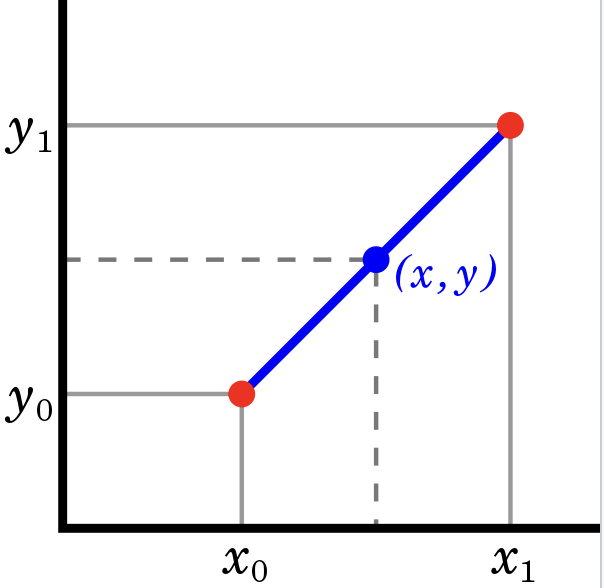

In [9]:
# Ïã§Ï†úÎ°ú Í≤∞Ï∏°ÏπòÎùºÍ≥† ÌëúÏãúÎäî ÏïàÎêòÏñ¥ÏûàÏßÄÎßå ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÎì§Ïù¥ ÏïÑÎûòÏôÄ Í∞ôÏù¥ Ï°¥Ïû¨Ìï©ÎãàÎã§.
# ÏïÑÎûò 3Í∞ÄÏßÄÏùò Í≤ΩÏö∞ Î™®Îëê ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî elementÍ∞Ä Ìè¨Ìï®ÎêòÏñ¥ ÏûàÏäµÎãàÎã§.
display(concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].value_counts())

            1111271
20230630        585
20230831        496
20230428        394
20230731        374
             ...   
20230105          3
20230125          3
20230109          1
20230102          1
20230104          1
Name: Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê, Length: 182, dtype: int64

In [10]:
display(concat['Í±∞ÎûòÏú†Ìòï'].value_counts())

-       1086451
Ï§ëÍ∞úÍ±∞Îûò      38123
ÏßÅÍ±∞Îûò        3520
Name: Í±∞ÎûòÏú†Ìòï, dtype: int64

In [11]:
display(concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].value_counts())

-                    1090013
ÏÑúÏö∏ ÎÖ∏ÏõêÍµ¨                  2627
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨                  2540
ÏÑúÏö∏ Í∞ïÎÇ®Íµ¨                  2508
ÏÑúÏö∏ Í∞ïÎèôÍµ¨                  2038
                      ...   
ÏÑúÏö∏ Í∞ïÎ∂ÅÍµ¨, ÏÑúÏö∏ ÏñëÏ≤úÍµ¨             1
Í≤ΩÍ∏∞ ÎÇ®ÏñëÏ£ºÏãú, Í≤ΩÍ∏∞ ÏÑ±ÎÇ®ÏàòÏ†ïÍµ¨          1
ÏÑúÏö∏ ÏÜ°ÌååÍµ¨, Ïù∏Ï≤ú Í≥ÑÏñëÍµ¨             1
Í≤ΩÍ∏∞ Ïó∞Ï≤úÍµ∞, ÏÑúÏö∏ ÏÜ°ÌååÍµ¨             1
ÏÑúÏö∏ Ï§ëÎûëÍµ¨, Ïù∏Ï≤ú Î∂ÄÌèâÍµ¨             1
Name: Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ, Length: 739, dtype: int64

In [12]:
# ÏúÑ Ï≤òÎüº ÏïÑÎ¨¥ ÏùòÎØ∏ÎèÑ Í∞ñÏßÄ ÏïäÎäî ÏπºÎüºÏùÄ Í≤∞Ï∏°ÏπòÏôÄ Í∞ôÏùÄ Ïó≠Ìï†ÏùÑ ÌïòÎØÄÎ°ú, np.nanÏúºÎ°ú Ï±ÑÏõå Í≤∞Ï∏°ÏπòÎ°ú Ïù∏ÏãùÎêòÎèÑÎ°ù Ìï©ÎãàÎã§.
concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'] = concat['Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê'].replace(' ', np.nan)
concat['Í±∞ÎûòÏú†Ìòï'] = concat['Í±∞ÎûòÏú†Ìòï'].replace('-', np.nan)
concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'] = concat['Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ'].replace('-', np.nan)

In [13]:
# EDAÏóê ÏïûÏÑú Í≤∞Ï∏°ÏπòÎ•º ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat.isnull().sum()

ÏãúÍµ∞Íµ¨                             0
Î≤àÏßÄ                            227
Î≥∏Î≤à                             75
Î∂ÄÎ≤à                             75
ÏïÑÌååÌä∏Î™Ö                         2136
Ï†ÑÏö©Î©¥Ï†Å                            0
Í≥ÑÏïΩÎÖÑÏõî                            0
Í≥ÑÏïΩÏùº                             0
Ï∏µ                               0
Í±¥Ï∂ïÎÖÑÎèÑ                            0
ÎèÑÎ°úÎ™Ö                             0
Ìï¥Ï†úÏÇ¨Ïú†Î∞úÏÉùÏùº                   1121899
Îì±Í∏∞Ïã†Ï≤≠ÏùºÏûê                    1111271
Í±∞ÎûòÏú†Ìòï                      1086451
Ï§ëÍ∞úÏÇ¨ÏÜåÏû¨ÏßÄ                    1090013
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)         877273
k-Ï†ÑÌôîÎ≤àÌò∏                     876850
k-Ìå©Ïä§Î≤àÌò∏                     879348
Îã®ÏßÄÏÜåÍ∞úÍ∏∞Ï°¥clob                1058958
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)               876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                     876125
k-Î≥µÎèÑÏú†Ìòï                     876454
k-ÎÇúÎ∞©Î∞©Ïãù                     876125
k-Ï†ÑÏ≤¥ÎèôÏàò

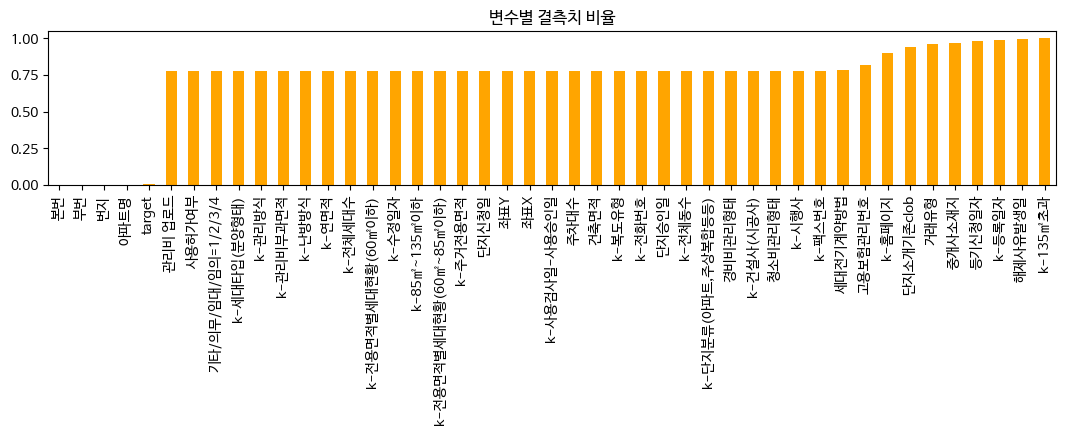

In [14]:
# Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°ÏπòÏùò ÎπÑÏú®ÏùÑ plotÏúºÎ°ú Í∑∏Î†§Î≥¥Î©¥ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
fig = plt.figure(figsize=(13, 2))
missing = concat.isnull().sum() / concat.shape[0]
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color='orange')
plt.title('Î≥ÄÏàòÎ≥Ñ Í≤∞Ï∏°Ïπò ÎπÑÏú®')
plt.show()

- ÏúÑ Í∑∏ÎûòÌîÑÏóêÏÑú Î≥º Ïàò ÏûàÎã§ÏãúÌîº Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÎì§ÏùÄ Í≤∞Ï∏°ÏπòÍ∞Ä Ìï¥Îãπ ÏπºÎüºÏùò element Ï§ë 90% Ïù¥ÏÉÅÏùÑ Ï∞®ÏßÄÌïòÎäî ÏÉÅÌô©Ïù¥ Îê©ÎãàÎã§.
- Îî∞ÎùºÏÑú Î≥∏ Baseline ÏóêÏÑúÎäî Ïù¥ ÏπºÎüºÏùÄ ÏòàÏ∏°Ïóê ÎèÑÏõÄÏù¥ ÎêòÏßÄ ÏïäÎäîÎã§Í≥† ÌåêÎã®Ìï¥ ÏÇ≠Ï†úÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [15]:
# NullÍ∞íÏù¥ 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ ÏπºÎüºÏùÄ ÏÇ≠Ï†úÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() <= 1000000]))     # ÎÇ®Í≤®Ïßà Î≥ÄÏàòÎì§ÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print('* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÏÉÅÏù∏ Î≥ÄÏàòÎì§ :', list(concat.columns[concat.isnull().sum() >= 1000000]))

* Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§ : ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target', 'is_test']
* Í≤∞Ï∏°ÏπòÍ∞Ä 1

In [16]:
# ÏúÑÏóêÏÑú Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ïù¥ÌïòÏù∏ Î≥ÄÏàòÎì§Îßå Í≥®Îùº ÏÉàÎ°úÏö¥ concat_select Í∞ùÏ≤¥Î°ú Ï†ÄÏû•Ìï¥Ï§çÎãàÎã§.
selected = list(concat.columns[concat.isnull().sum() <= 1000000])
concat_select = concat[selected]

In [17]:
concat_select.isnull().sum()     # Í≤∞Ï∏°ÏπòÍ∞Ä 100ÎßåÍ∞ú Ï¥àÍ≥ºÏù∏ ÏπºÎüºÏù¥ Ï†úÍ±∞Îêú Î™®ÏäµÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
# targetÎ≥ÄÏàòÎäî test dataset Í∞úÏàòÎßåÌÅº(9272) Í≤∞Ï∏°ÏπòÍ∞Ä Ï°¥Ïû¨Ìï®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

ÏãúÍµ∞Íµ¨                            0
Î≤àÏßÄ                           227
Î≥∏Î≤à                            75
Î∂ÄÎ≤à                            75
ÏïÑÌååÌä∏Î™Ö                        2136
Ï†ÑÏö©Î©¥Ï†Å                           0
Í≥ÑÏïΩÎÖÑÏõî                           0
Í≥ÑÏïΩÏùº                            0
Ï∏µ                              0
Í±¥Ï∂ïÎÖÑÎèÑ                           0
ÎèÑÎ°úÎ™Ö                            0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        877273
k-Ï†ÑÌôîÎ≤àÌò∏                    876850
k-Ìå©Ïä§Î≤àÌò∏                    879348
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              876125
k-Í¥ÄÎ¶¨Î∞©Ïãù                    876125
k-Î≥µÎèÑÏú†Ìòï                    876454
k-ÎÇúÎ∞©Î∞©Ïãù                    876125
k-Ï†ÑÏ≤¥ÎèôÏàò                    877207
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   876125
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                877637
k-ÏãúÌñâÏÇ¨                     877834
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             876259
k-Ïó∞Î©¥Ï†Å                     876125


In [18]:
# Ïó∞ÏÜçÌòï Î≥ÄÏàòÎäî ÏÑ†ÌòïÎ≥¥Í∞ÑÏùÑ Ìï¥Ï£ºÍ≥†, Î≤îÏ£ºÌòïÎ≥ÄÏàòÎäî ÏïåÏàòÏóÜÍ∏∞Ïóê ‚Äúunknown‚ÄùÏù¥ÎùºÍ≥† ÏûÑÏùòÎ°ú Î≥¥Í∞ÑÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1128094 entries, 0 to 9271
Data columns (total 45 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   ÏãúÍµ∞Íµ¨                     1128094 non-null  object 
 1   Î≤àÏßÄ                      1127867 non-null  object 
 2   Î≥∏Î≤à                      1128019 non-null  float64
 3   Î∂ÄÎ≤à                      1128019 non-null  float64
 4   ÏïÑÌååÌä∏Î™Ö                    1125958 non-null  object 
 5   Ï†ÑÏö©Î©¥Ï†Å                    1128094 non-null  float64
 6   Í≥ÑÏïΩÎÖÑÏõî                    1128094 non-null  int64  
 7   Í≥ÑÏïΩÏùº                     1128094 non-null  int64  
 8   Ï∏µ                       1128094 non-null  int64  
 9   Í±¥Ï∂ïÎÖÑÎèÑ                    1128094 non-null  int64  
 10  ÎèÑÎ°úÎ™Ö                     1128094 non-null  object 
 11  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)      250821 non-null   object 
 12  k-Ï†ÑÌôîÎ≤àÌò∏           

In [19]:
# Î≥∏Î≤à, Î∂ÄÎ≤àÏùò Í≤ΩÏö∞ floatÎ°ú ÎêòÏñ¥ÏûàÏßÄÎßå Î≤îÏ£ºÌòï Î≥ÄÏàòÏùò ÏùòÎØ∏Î•º Í∞ÄÏßÄÎØÄÎ°ú object(string) ÌòïÌÉúÎ°ú Î∞îÍæ∏Ïñ¥Ï£ºÍ≥† ÏïÑÎûò ÏûëÏóÖÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Î≥∏Î≤à'] = concat_select['Î≥∏Î≤à'].astype('str')
concat_select['Î∂ÄÎ≤à'] = concat_select['Î∂ÄÎ≤à'].astype('str')

In [20]:
# Î®ºÏ†Ä, Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÎ•º ÏúÑ infoÏóê Îî∞Îùº Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns = []
categorical_columns = []

for column in concat_select.columns:
    if pd.api.types.is_numeric_dtype(concat_select[column]):
        continuous_columns.append(column)
    else:
        categorical_columns.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÎÖÑÏõî', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'target', 'is_test']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏãúÍµ∞Íµ¨', 'Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº']


- Ïó∞ÏÜçÌòï Î≥ÄÏàòÏôÄ Î≤îÏ£ºÌòï Î≥ÄÏàòÍ∞Ä ÏïåÎßûÍ≤å ÎÇòÎàÑÏñ¥Ï°åÎäîÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í≥†, Ïù¥Ï†ú Í∞ÅÍ∞Å Î≥¥Í∞ÑÏùÑ ÏßÑÌñâÌï©ÎãàÎã§.

In [21]:
# Î≤îÏ£ºÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ
concat_select[categorical_columns] = concat_select[categorical_columns].fillna('NULL')

# Ïó∞ÏÜçÌòï Î≥ÄÏàòÏóê ÎåÄÌïú Î≥¥Í∞Ñ (ÏÑ†Ìòï Î≥¥Í∞Ñ)
concat_select[continuous_columns] = concat_select[continuous_columns].interpolate(method='linear', axis=0)

In [22]:
concat_select.isnull().sum()         # Í≤∞Ï∏°ÏπòÍ∞Ä Î≥¥Í∞ÑÎêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï¥Î¥ÖÎãàÎã§.

ÏãúÍµ∞Íµ¨                       0
Î≤àÏßÄ                        0
Î≥∏Î≤à                        0
Î∂ÄÎ≤à                        0
ÏïÑÌååÌä∏Î™Ö                      0
Ï†ÑÏö©Î©¥Ï†Å                      0
Í≥ÑÏïΩÎÖÑÏõî                      0
Í≥ÑÏïΩÏùº                       0
Ï∏µ                         0
Í±¥Ï∂ïÎÖÑÎèÑ                      0
ÎèÑÎ°úÎ™Ö                       0
k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)        0
k-Ï†ÑÌôîÎ≤àÌò∏                    0
k-Ìå©Ïä§Î≤àÌò∏                    0
k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)              0
k-Í¥ÄÎ¶¨Î∞©Ïãù                    0
k-Î≥µÎèÑÏú†Ìòï                    0
k-ÎÇúÎ∞©Î∞©Ïãù                    0
k-Ï†ÑÏ≤¥ÎèôÏàò                    0
k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò                   0
k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)                0
k-ÏãúÌñâÏÇ¨                     0
k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº             0
k-Ïó∞Î©¥Ï†Å                     0
k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å                  0
k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å                 0
k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥

- BaselineÏóêÏÑúÎäî Îã®Ïàú Í≤∞Ï∏°ÏπòÎì§ÏùÑ Ï†úÍ±∞ÌïòÍ±∞ÎÇò Î≥¥Í∞ÑÌñàÏßÄÎßå,
EDAÎ•º ÌÜµÌï¥ Î≥ÄÏàòÎì§Ïùò ÌùêÎ¶ÑÏùÑ Ï°∞Í∏à Îçî ÌååÏïÖÌïòÍ≥† Îçî ÎÇòÏùÄ interpolation Îì±Ïùò Î∞©Î≤ïÏùÑ Í≥†Î†§Ìï¥Î≥º Ïàò ÏûàÏùÑ Í≤É Í∞ôÏäµÎãàÎã§.

### 3.2. Ïù¥ÏÉÅÏπò Ï≤òÎ¶¨
- Ïù¥Î≤àÏóî Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨Ìï¥Î¥ÖÏãúÎã§.
- Ïù¥ÏÉÅÏπòÎ•º Ï≤òÎ¶¨ÌïòÎäî Î∞©Î≤ïÏùÄ IQR, Z-score Îì± Îã§ÏñëÌïú Î∞©Î≤ïÏù¥ ÏûàÏäµÎãàÎã§. Í∞ÄÏû• ÏâΩÍ≥† ÏßÅÍ¥ÄÏ†ÅÏúºÎ°ú Ï†ëÍ∑ºÌïòÎäî Î∞©Î≤ïÏùÄ Í∏∞Î≥∏ ÌÜµÍ≥ÑÏπòÎ•º Ïù¥Ïö©ÌïòÎäî Í≤ÉÏûÖÎãàÎã§.
- Î≥∏ baselineÏóêÏÑúÎäî IQRÎ•º Ïù¥Ïö©Ìïú Î∞©Î≤ïÏùÑ ÏÇ¨Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.

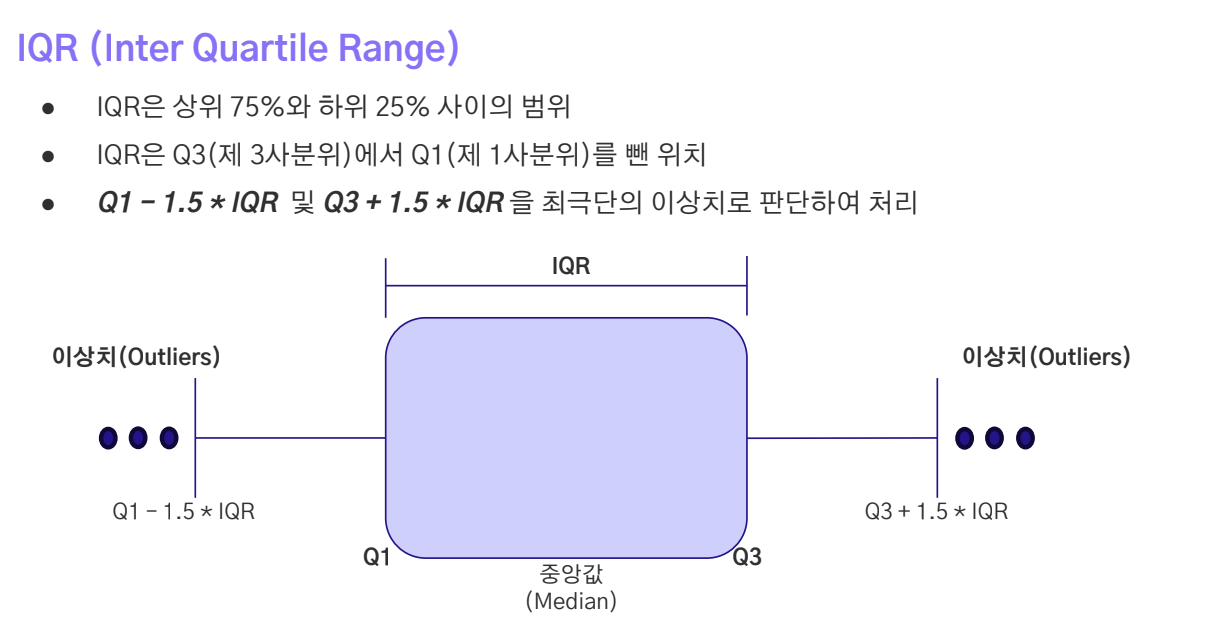

In [23]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Ïù¥Ï†ÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.
print(concat_select.shape)

(1128094, 45)


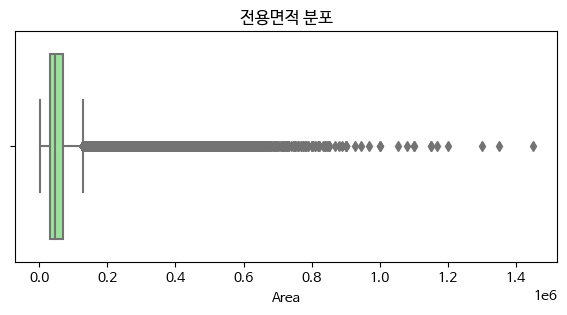

In [24]:
# ÎåÄÌëúÏ†ÅÏù∏ Ïó∞ÏÜçÌòï Î≥ÄÏàòÏù∏ ‚ÄúÏ†ÑÏö© Î©¥Ï†Å‚Äù Î≥ÄÏàò Í¥ÄÎ†®Ìïú Î∂ÑÌè¨Î•º Î®ºÏ†Ä ÏÇ¥Ìé¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
fig = plt.figure(figsize=(7, 3))
sns.boxplot(data = concat_select, x = 'target', color='lightgreen')
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨')
plt.xlabel('Area')
plt.show()

In [25]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ Î∞©Î≤ïÏóêÎäî IQRÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
def remove_outliers_iqr(dt, column_name):
    df = dt.query('is_test == 0')       # train data ÎÇ¥Ïóê ÏûàÎäî Ïù¥ÏÉÅÏπòÎßå Ï†úÍ±∞ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
    df_test = dt.query('is_test == 1')

    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df = df[(df[column_name] >= lower_bound) & (df[column_name] <= upper_bound)]

    result = pd.concat([df, df_test])   # test dataÏôÄ Îã§Ïãú Ìï©Ï≥êÏ£ºÍ≤†ÏäµÎãàÎã§.
    return result

In [26]:
# ÏúÑ Î∞©Î≤ïÏúºÎ°ú Ï†ÑÏö© Î©¥Ï†ÅÏóê ÎåÄÌïú Ïù¥ÏÉÅÏπòÎ•º Ï†úÍ±∞Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
concat_select = remove_outliers_iqr(concat_select, 'Ï†ÑÏö©Î©¥Ï†Å')

In [27]:
concat_select = concat_select[
    ~((concat_select['is_test'] == 0) & 
      ((concat_select['Ï∏µ'] > 50) | (concat_select['target'] > 510000)))
]

In [28]:
# concat_select = concat_select[(concat_select['Ï∏µ'] < 50) & (concat_select['is_test'] == 0)]
# concat_select = concat_select[(concat_select['target'] < 510000) & (concat_select['is_test'] == 0)]

# concat_select.loc[concat_select['is_test'] == 0, :] = concat_select.loc[
#     (concat_select['is_test'] == 0) & (concat_select['Ï∏µ'] <= 50)
# ]


In [29]:
# Ïù¥ÏÉÅÏπò Ï†úÍ±∞ ÌõÑÏùò shapeÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÏïΩ 10ÎßåÍ∞úÏùò Îç∞Ïù¥ÌÑ∞Í∞Ä Ï†úÍ±∞Îêú Î™®ÏäµÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
print(concat_select.shape)

(1038824, 45)


In [30]:
concat_select['is_test'].value_counts()     # ÎòêÌïú, train dataÎßå Ï†úÍ±∞ÎêòÏóàÏäµÎãàÎã§.(1038846, 45)

0    1029552
1       9272
Name: is_test, dtype: int64

## 4. Feature Engineering
- Ïù¥Ï†ú ÌååÏÉùÎ≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
- ÌååÏÉù Î≥ÄÏàòÎäî ÎèÑÎ©îÏù∏ ÏßÄÏãùÏóê Í∏∞Î∞òÌï¥ Ï†úÏûëÌïòÎäî Í≤ÉÏù¥ Ï§ëÏöîÌï©ÎãàÎã§.
- Ï£ºÌÉùÏùò Í∞ÄÍ≤©ÏùÑ ÏòàÏ∏°ÌïòÎäî Î¨∏Ï†úÏù¥Í∏∞ ÎïåÎ¨∏Ïóê ÏïΩÍ∞ÑÏùò Î∂ÄÎèôÏÇ∞ ÏßÄÏãùÏùÑ Í∏∞Î∞òÏúºÎ°ú ÌååÏÉù Î≥ÄÏàòÎ•º ÎßåÎì§Ïñ¥ Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [31]:
# ÏãúÍµ∞Íµ¨, ÎÖÑÏõî Îì± Î∂ÑÌï†Ìï† Ïàò ÏûàÎäî Î≥ÄÏàòÎì§ÏùÄ ÏÑ∏Î∂ÄÏÇ¨Ìï≠ Í≥†Î†§Î•º Ïö©Ïù¥ÌïòÍ≤å ÌïòÍ∏∞ ÏúÑÌï¥ Î™®Îëê Î∂ÑÌï†Ìï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.
concat_select['Íµ¨'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[1])
concat_select['Îèô'] = concat_select['ÏãúÍµ∞Íµ¨'].map(lambda x : x.split()[2])
del concat_select['ÏãúÍµ∞Íµ¨']

concat_select['Í≥ÑÏïΩÎÖÑ'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[:4])
concat_select['Í≥ÑÏïΩÏõî'] = concat_select['Í≥ÑÏïΩÎÖÑÏõî'].astype('str').map(lambda x : x[4:])
del concat_select['Í≥ÑÏïΩÎÖÑÏõî']

In [32]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö',
       'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
       'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨',
       'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
       'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
       'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target',
       'is_test', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî

In [33]:
concat_select['k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å']

0       20204.0
1       20204.0
2       20204.0
3       20204.0
4       20204.0
         ...   
9267    93849.0
9268    93849.0
9269    93849.0
9270    93849.0
9271    93849.0
Name: k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å, Length: 1038824, dtype: float64

- ÏÑúÏö∏Ïùò ÏßëÍ∞íÏùÄ Í∞ïÎÇ®, Í∞ïÎ∂Å Ïó¨Î∂ÄÏóê Îî∞Îùº Ï∞®Ïù¥Í∞Ä ÎßéÏù¥ ÎÇúÎã§Îäî ÏÇ¨Ïã§ÏùÄ ÎßéÏù¥ ÏïåÎ†§ÏßÑ ÏÇ¨Ïã§ÏûÖÎãàÎã§.
- Îî∞ÎùºÏÑú Í∞ïÎÇ®/Í∞ïÎ∂ÅÏùò Ïó¨Î∂ÄÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º ÏÉùÏÑ±Ìï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [34]:
all = list(concat_select['Íµ¨'].unique())
gangnam = ['Í∞ïÏÑúÍµ¨', 'ÏòÅÎì±Ìè¨Íµ¨', 'ÎèôÏûëÍµ¨', 'ÏÑúÏ¥àÍµ¨', 'Í∞ïÎÇ®Íµ¨', 'ÏÜ°ÌååÍµ¨', 'Í∞ïÎèôÍµ¨']
gangbuk = [x for x in all if x not in gangnam]

assert len(all) == len(gangnam) + len(gangbuk)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [35]:
# Í∞ïÎÇ®Ïùò Ïó¨Î∂ÄÎ•º Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.
is_gangnam = []
for x in concat_select['Íµ¨'].tolist() :
  if x in gangnam :
    is_gangnam.append(1)
  else :
    is_gangnam.append(0)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎ¶ÖÎãàÎã§.
concat_select['Í∞ïÎÇ®Ïó¨Î∂Ä'] = is_gangnam

In [36]:
# Ï†ÑÏö©Î©¥Ï†Å Î≤îÏ£ºÌôî
bins = [0, 60, 85, 135, np.inf]
labels = ['ÏÜåÌòï', 'Ï§ëÌòï', 'ÎåÄÌòï', 'Ï¥àÎåÄÌòï']
concat_select['ÌèâÌòïÎåÄ'] = pd.cut(concat_select['Ï†ÑÏö©Î©¥Ï†Å'], bins=bins, labels=labels)

In [37]:
# # Ïû¨Í±¥Ï∂ï Í∞ÄÎä•ÏÑ± Ï∂îÍ∞Ä
# concat_select['Í±¥Ï∂ïÏó∞Ï∞®'] = 2024 - concat_select['Í±¥Ï∂ïÎÖÑÎèÑ']
# concat_select['Ïû¨Í±¥Ï∂ïÍ∞ÄÎä•'] = (concat_select['Í±¥Ï∂ïÏó∞Ï∞®'] >= 30).astype(int)

In [38]:
# Í≥ÑÏïΩ Ïó∞ÎèÑÎ≥Ñ Í∞ÄÍ≤© ÏÉÅÏäπÎ•†
concat_select['Í∞ÄÍ≤©ÏÉÅÏäπÎ•†'] = concat_select.groupby('Í≥ÑÏïΩÎÖÑ')['target'].transform(
    lambda x: (x - x.mean()) / x.mean())

In [39]:
# Îèô Îì±Í∏â Ï†ïÌïòÍ∏∞
all = list(concat_select['Îèô'].unique())
dong_level_1 = ['Í∞úÌè¨Îèô', 'Î∞òÌè¨Îèô', 'ÏïïÍµ¨Ï†ïÎèô', 'Ïû†ÏõêÎèô', 'ÍµêÎ∂ÅÎèô', 'Ïû†Ïã§Îèô', 'ÏùºÏõêÎèô', 'ÏàòÏÑúÎèô', 'ÌôçÌååÎèô', 'ÌèâÎèô', 'Ïã†Í≥ÑÎèô', 'ÏÇºÏÑ±Îèô', 'ÎèÑÍ≥°Îèô', 'ÏÑúÎπôÍ≥†Îèô', 'Ï≤≠Îã¥Îèô', 'ÏïÑÌòÑÎèô', 'ÏÑ±ÏàòÎèô1Í∞Ä', 'Ïö©ÏÇ∞Îèô5Í∞Ä', 'Ïö©Í∞ïÎèô', 'ÏûêÍ≥°Îèô', 'Ïã†Ï≤úÎèô', 'Î≥¥Í¥ëÎèô', 'Î∂ÅÏïÑÌòÑÎèô', 'ÌïúÎÇ®Îèô', 'Ïù¥Ï¥åÎèô', 'ÏÑ±ÏàòÎèô2Í∞Ä', 'Ïö©Î¨∏Îèô', 'Í∏àÌò∏Îèô1Í∞Ä', 'ÌòÑÏÑùÎèô', 'Ïã†ÏõêÎèô', 'Ïò•ÏàòÎèô', 'ÏÉÅÏàòÎèô', 'Í≥†ÎçïÎèô', 'Ïó≠ÏÇºÎèô', 'ÎåÄÏπòÎèô', 'ÏÑ∏Í≥°Îèô', 'Í∏àÌò∏Îèô2Í∞Ä', 'Ïû•ÏßÄÎèô', 'Í∏àÌò∏Îèô4Í∞Ä', 'Ïã†Ï†ïÎèô', 'ÏÑúÏ¥àÎèô', 'ÏàúÌôîÎèô', 'Î∞©Î∞∞Îèô', 'ÎÇ¥Í≥°Îèô', 'Í¥ëÏû•Îèô', 'ÌùëÏÑùÎèô', 'ÌïúÍ∞ïÎ°ú3Í∞Ä', 'ÏõêÌö®Î°ú4Í∞Ä', 'Ïó¨ÏùòÎèÑÎèô', 'ÎÖºÌòÑÎèô', 'ÏÉÅÏôïÏã≠Î¶¨Îèô', 'Ïö∞Î©¥Îèô', 'Ìö®Ï∞ΩÎèô', 'ÏÉÅÏùºÎèô', 'Î∞©Ïù¥Îèô', 'ÌñâÎãπÎèô', 'ÎåÄÌù•Îèô', 'ÏõêÌö®Î°ú1Í∞Ä', 'Î™©Îèô', 'ÎèÑÏõêÎèô', 'Ï§ëÎ¶ºÎèô', 'ÎèôÏûêÎèô', 'ÌïòÏôïÏã≠Î¶¨Îèô', 'ÏóºÎ¶¨Îèô', 'ÎßåÎ¶¨Îèô1Í∞Ä', 'ÌÜ†Ï†ïÎèô', 'Ïã†Í≥µÎçïÎèô', 'Ïã†ÏÇ¨Îèô', 'Í≥µÎçïÎèô', 'ÎèôÏûëÎèô', 'ÏòÅÎì±Ìè¨Îèô7Í∞Ä', 'Î™ÖÏùºÎèô', 'ÌïòÏ§ëÎèô', 'Ï∞ΩÏ†ÑÎèô', 'ÏÇ∞Ï≤úÎèô', 'ÏÜ°ÌååÎèô', 'ÏÇºÏÑ†Îèô3Í∞Ä', 'Î¨∏Î∞∞Îèô', 'ÎãπÏÇ∞Îèô5Í∞Ä', 'ÌíçÎÇ©Îèô', 'ÏûêÏñëÎèô', 'ÎßàÍ≥°Îèô', 'Ïù¥ÌÉúÏõêÎèô', 'ÏùëÎ¥âÎèô', 'ÎÇ®ÎåÄÎ¨∏Î°ú5Í∞Ä', 'ÌïúÍ∞ïÎ°ú2Í∞Ä', 'Ìö®Ï†úÎèô', 'Î≥¥Î¨∏Îèô6Í∞Ä', 'ÎãπÏÇ∞Îèô4Í∞Ä', 'Î≥∏Îèô', 'Ïó∞ÏßÄÎèô', 'Ïó∞Í±¥Îèô', 'Í∞ÄÎùΩÎèô', 'ÎèÑÌôîÎèô', 'ÎèôÏÜåÎ¨∏Îèô5Í∞Ä', 'ÎÇ®Í∞ÄÏ¢åÎèô', 'Î¨∏Ï†ïÎèô', 'ÏÉÅÎèÑÎèô', 'ÏÇ¨ÏßÅÎèô', 'Í∏àÌò∏Îèô3Í∞Ä']
dong_level_2 = [x for x in all if x not in dong_level_1]

assert len(all) == len(dong_level_1) + len(dong_level_2)       # ÏïåÎßûÍ≤å Î∂ÑÎ¶¨ÎêòÏóàÎäîÏßÄ Ï≤¥ÌÅ¨Ìï©ÎãàÎã§.

In [40]:
# Îèô Îì±Í∏â Î∂ÑÎ•ò Ï≤¥ÌÅ¨
dong_level = []
for x in concat_select['Îèô'].tolist() :
  if x in dong_level_1 :
    dong_level.append(1)
  else :
    dong_level.append(2)

# ÌååÏÉùÎ≥ÄÏàòÎ•º ÌïòÎÇò ÎßåÎì≠ÎãàÎã§.
concat_select['ÎèôÎì±Í∏â'] = dong_level

In [41]:
# Î∏åÎûúÎìú ÌÇ§ÏõåÎìú Î¶¨Ïä§Ìä∏
keywords = ['ÌûêÏä§ÌÖåÏù¥Ìä∏', 'Î°ØÎç∞Ï∫êÏä¨', 'Ìë∏Î•¥ÏßÄÏò§', 'ÎûòÎØ∏Ïïà', 'eÌé∏Ìïú', 'ÏúÑÎ∏å', 'ÎçîÏÉµ', 'ÏïÑÏù¥ÌååÌÅ¨', 'ÏàòÏûêÏù∏',
            'ÏïÑÌÖåÎùº', 'ÏûêÏù¥', 'ÏÑúÌù¨Ïä§ÌÉÄÌûêÏä§', 'ÏóêÌîºÌä∏', 'Ìò∏Î∞òÎ≤†Î•¥ÎîîÏõÄ', 'ÌïòÎäòÏ±Ñ', 'ÎçîÌîåÎûòÌã∞ÎÑò', 'Ïö∞ÎØ∏Î¶∞', 
            'ÏΩîÏïÑÎ£®', 'ÏÑºÌä∏Î†àÎπå', 'ÌïúÌôîÌè¨Î†àÎÇò', 'Ïä§ÏúÑÏ≤∏', 'SKÎ∑∞', 'Î¶¨ÏäàÎπå', 'ÎèôÎ¨∏ÍµøÎ™®ÎãùÌûê', 'Îç∞ÏãúÏïô', 'Î≤ΩÏÇ∞Î∏îÎ£®Î∞ç']

# Ï°∞Í±¥Ïóê Îî∞Îùº 'Î∏åÎûúÎìúÎì±Í∏â' Ïª¨Îüº Í∞í Ï∂îÍ∞Ä
concat_select['Î∏åÎûúÎìúÎì±Í∏â'] = concat_select['ÏïÑÌååÌä∏Î™Ö'].apply(
    lambda x: 1 if any(keyword in x for keyword in keywords) else 2
)

In [42]:
# ÌïúÍ∞ïÎ≤®Ìä∏
hangang = ['Í¥ëÏû•Îèô', 'Íµ¨ÏùòÎèô', 'ÏûêÏñëÎèô', 'ÏÑ±ÏàòÎèô2Í∞Ä', 'ÏÑ±ÏàòÎèô1Í∞Ä', 'Í∏àÌò∏Îèô4Í∞Ä', 'Ïò•ÏàòÎèô', 'ÌïúÎÇ®Îèô', 'Î≥¥Í¥ëÎèô', 'ÎèôÎπôÍ≥†Îèô', 'ÏÑúÎπôÍ≥†Îèô', 'Ïù¥Ï¥åÎèô', 'ÏõêÌö®Î°ú4Í∞Ä', 'Ï≤≠ÏïîÎèô', 'ÎßàÌè¨Îèô', 'ÌÜ†Ï†ïÎèô', 'Ïö©Í∞ïÎèô', 'ÌòÑÏÑùÎèô', 'Ïã†Ï†ïÎèô', 'ÌïòÏ§ëÎèô', 'ÏÉÅÏàòÎèô', 'ÎãπÏù∏Îèô', 'Ìï©Ï†ïÎèô', 'ÎßùÏõêÎèô', 'ÏÉÅÏïîÎèô', 'Í∞ÄÏñëÎèô', 'ÏóºÏ∞ΩÎèô', 'ÏñëÌôîÎèô', 'ÎãπÏÇ∞Îèô', 'ÏñëÌèâÎèô6Í∞Ä', 'ÏñëÌèâÎèô5Í∞Ä', 'ÏñëÌèâÎèô4Í∞Ä', 'ÎãπÏÇ∞Îèô6Í∞Ä', 'ÎãπÏÇ∞Îèô5Í∞Ä', 'ÎãπÏÇ∞Îèô', 'Ïó¨ÏùòÎèÑÎèô', 'Î≥∏Îèô', 'ÌùëÏÑùÎèô', 'ÎèôÏûëÎèô', 'Î∞òÌè¨Îèô', 'Ïû†ÏõêÎèô', 'ÏïÑÏø†Ï†ïÎèô', 'Ïã†ÏÇ¨Îèô', 'Ï≤≠Îã¥Îèô', 'ÏÇºÏÑ±Îèô', 'Ïû†Ïã§Îèô', 'Ïã†Ï≤úÎèô', 'ÌíçÎÇ©Îèô', 'Ï≤úÌò∏Îèô', 'ÏïîÏÇ¨Îèô', 'Í≥†ÎçïÎèô', 'Í∞ïÏùºÎèô']

hangang_belt = []

for name in concat_select['Îèô']:
    if any(keyword in name for keyword in hangang):
        hangang_belt.append(1)  # ÌÇ§ÏõåÎìú Ìè¨Ìï® Ïãú Îì±Í∏â 1
    else:
        hangang_belt.append(2)  # ÌÇ§ÏõåÎìú ÎØ∏Ìè¨Ìï® Ïãú Îì±Í∏â 2

# Í≤∞Í≥ºÎ•º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùò 'Î∏åÎûúÎìúÎì±Í∏â' Ïª¨ÎüºÏóê Ï∂îÍ∞Ä
concat_select['ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä'] = hangang_belt

In [43]:
# ÌïôÍµ∞
hakgun = {
    'ÎèôÎåÄÎ¨∏Íµ¨': '1ÌïôÍµ∞', 'Ï§ëÎûëÍµ¨': '1ÌïôÍµ∞',
    'ÎßàÌè¨Íµ¨': '2ÌïôÍµ∞', 'ÏÑúÎåÄÎ¨∏Íµ¨': '2ÌïôÍµ∞',
    'ÏùÄÌèâÍµ¨': '2ÌïôÍµ∞', 'Íµ¨Î°úÍµ¨': '3ÌïôÍµ∞',
    'Í∏àÏ≤úÍµ¨': '3ÌïôÍµ∞', 'ÏòÅÎì±Ìè¨Íµ¨': '3ÌïôÍµ∞',
    'ÎÖ∏ÏõêÍµ¨': '4ÌïôÍµ∞', 'ÎèÑÎ¥âÍµ¨': '4ÌïôÍµ∞',
    'Ïö©ÏÇ∞Íµ¨': '5ÌïôÍµ∞', 'Ï¢ÖÎ°úÍµ¨': '5ÌïôÍµ∞',
    'Ï§ëÍµ¨': '5ÌïôÍµ∞', 'Í∞ïÎèôÍµ¨': '6ÌïôÍµ∞',
    'ÏÜ°ÌååÍµ¨': '6ÌïôÍµ∞', 'Í∞ïÏÑúÍµ¨': '7ÌïôÍµ∞',
    'ÏñëÏ≤úÍµ¨': '7ÌïôÍµ∞', 'Í∞ïÎÇ®Íµ¨': '8ÌïôÍµ∞',
    'ÏÑúÏ¥àÍµ¨': '8ÌïôÍµ∞', 'Í¥ÄÏïÖÍµ¨': '9ÌïôÍµ∞',
    'ÎèôÏûëÍµ¨': '9ÌïôÍµ∞', 'Í¥ëÏßÑÍµ¨': '10ÌïôÍµ∞',
    'ÏÑ±ÎèôÍµ¨': '10ÌïôÍµ∞', 'Í∞ïÎ∂ÅÍµ¨': '11ÌïôÍµ∞',
    'ÏÑ±Î∂ÅÍµ¨': '11ÌïôÍµ∞'
}
concat_select['ÌïôÍµ∞'] = concat_select['Íµ¨'].map(hakgun)

print(concat_select[['Íµ¨', 'ÌïôÍµ∞']].head())

     Íµ¨   ÌïôÍµ∞
0  Í∞ïÎÇ®Íµ¨  8ÌïôÍµ∞
1  Í∞ïÎÇ®Íµ¨  8ÌïôÍµ∞
2  Í∞ïÎÇ®Íµ¨  8ÌïôÍµ∞
3  Í∞ïÎÇ®Íµ¨  8ÌïôÍµ∞
4  Í∞ïÎÇ®Íµ¨  8ÌïôÍµ∞


In [44]:
# ÏßÄÌïòÏ≤† Îç∞Ïù¥ÌÑ∞
subway_data = pd.read_csv('/data/ephemeral/home/data/subway_feature.csv')
subway_data.head()

Ïó≠ÏÇ¨_ID   Ïó≠ÏÇ¨Î™Ö      Ìò∏ÏÑ†         ÏúÑÎèÑ          Í≤ΩÎèÑ
0   9996    ÎØ∏ÏÇ¨     5Ìò∏ÏÑ†  37.560927  127.193877
1   9995    Í∞ïÏùº     5Ìò∏ÏÑ†  37.557490  127.175930
2   4929  ÍπÄÌè¨Í≥µÌï≠  ÍπÄÌè¨Í≥®ÎìúÎùºÏù∏  37.562360  126.801868
3   4928    Í≥†Ï¥å  ÍπÄÌè¨Í≥®ÎìúÎùºÏù∏  37.601243  126.770345
4   4927    ÌíçÎ¨¥  ÍπÄÌè¨Í≥®ÎìúÎùºÏù∏  37.612488  126.732387

In [45]:
# ÏïÑÌååÌä∏ Îç∞Ïù¥ÌÑ∞ Ï§ÄÎπÑ
apartment_data = concat_select[['ÏïÑÌååÌä∏Î™Ö', 'Ï¢åÌëúX', 'Ï¢åÌëúY']].copy()
apartment_data.rename(columns={'Ï¢åÌëúX': 'ÏïÑÌååÌä∏X', 'Ï¢åÌëúY': 'ÏïÑÌååÌä∏Y'}, inplace=True)

# ÏßÄÌïòÏ≤† Îç∞Ïù¥ÌÑ∞ Î∂àÎü¨Ïò§Í∏∞
subway_data = pd.read_csv('/data/ephemeral/home/data/subway_feature.csv')
subway_data.rename(columns={'ÏúÑÎèÑ': 'ÏßÄÌïòÏ≤†X', 'Í≤ΩÎèÑ': 'ÏßÄÌïòÏ≤†Y'}, inplace=True)

In [46]:
from scipy.spatial.distance import cdist
from sklearn.preprocessing import MinMaxScaler


# ÏïÑÌååÌä∏ Ï¢åÌëúÏôÄ ÏßÄÌïòÏ≤† Ï¢åÌëú Ï∂îÏ∂ú
apartment_coords = apartment_data[['ÏïÑÌååÌä∏X', 'ÏïÑÌååÌä∏Y']].to_numpy()
subway_coords = subway_data[['ÏßÄÌïòÏ≤†X', 'ÏßÄÌïòÏ≤†Y']].to_numpy()

# Î™®Îì† ÏïÑÌååÌä∏ÏôÄ ÏßÄÌïòÏ≤† Í∞Ñ Í±∞Î¶¨ Í≥ÑÏÇ∞ (Î≤°ÌÑ∞Ìôî)
distances = cdist(apartment_coords, subway_coords)

# Í∞Å ÏïÑÌååÌä∏ÏôÄ Í∞ÄÏû• Í∞ÄÍπåÏö¥ ÏßÄÌïòÏ≤† Í±∞Î¶¨ Ï∞æÍ∏∞
nearest_distances = distances.min(axis=1)

# Í≤∞Í≥º Ï†ÄÏû•
concat_select['ÏßÄÌïòÏ≤†Í±∞Î¶¨'] = nearest_distances

# Í≤∞Í≥º Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏóêÏÑú ÏßÄÌïòÏ≤† Í±∞Î¶¨ Ï∂îÏ∂ú
distances = concat_select['ÏßÄÌïòÏ≤†Í±∞Î¶¨'].values.reshape(-1, 1)

# Ï†ïÍ∑úÌôî (MinMaxScaler ÏÇ¨Ïö©)
scaler = MinMaxScaler()
normalized_distances = scaler.fit_transform(distances)

# Ï†ïÍ∑úÌôîÎêú Í∞íÏùÑ ÏÉàÎ°úÏö¥ Ïª¨ÎüºÏúºÎ°ú Ï†ÄÏû•
concat_select['ÏßÄÌïòÏ≤†Í±∞Î¶¨'] = normalized_distances

# Í≤∞Í≥º ÌôïÏù∏
print(concat_select[['ÏïÑÌååÌä∏Î™Ö', 'ÏßÄÌïòÏ≤†Í±∞Î¶¨']].head())



     ÏïÑÌååÌä∏Î™Ö    ÏßÄÌïòÏ≤†Í±∞Î¶¨
0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  0.80757
1  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  0.80757
2  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  0.80757
3  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  0.80757
4  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  0.80757


In [47]:
# Í∏àÎ¶¨ ÏπºÎüº Ï∂îÍ∞Ä
rate_data = [
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2024-11-28', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2024-10-11', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2023-01-13', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.50}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2022-11-24', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2022-10-12', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2022-08-25', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.50},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2022-07-13', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.25}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2022-05-26', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.75},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2022-04-14', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.50}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2022-01-14', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2021-11-25', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2021-08-26', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 0.75},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2020-05-28', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 0.50}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2020-03-17', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 0.75},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2019-10-16', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.25}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2019-07-18', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.50},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2018-11-30', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.75}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2017-11-30', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.50},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2016-06-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.25}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2015-06-11', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.50},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2015-03-12', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 1.75}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2014-10-15', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.00},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2014-08-14', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.25}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2013-05-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.50},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2012-10-11', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.75}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2012-07-12', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.00},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2011-06-10', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.25}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2011-03-10', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.00},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2011-01-13', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.75}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2010-11-16', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.50},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2010-07-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.25}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2009-02-12', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.00},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2009-01-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 2.50}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2008-12-11', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.00},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2008-11-07', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2008-10-27', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2008-10-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 5.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2008-08-07', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 5.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2007-08-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 5.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2007-07-12', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.75},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2006-08-10', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.50}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2006-06-08', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2006-02-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2005-12-08', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.75},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2005-10-11', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.50}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2004-11-11', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2004-08-12', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.50}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2003-07-10', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 3.75},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2003-05-13', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2002-05-07', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.25},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2001-09-19', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.00}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2001-08-09', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.50},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2001-07-05', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.75}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2001-02-08', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 5.00},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '2000-10-05', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 5.25}, {'Î≥ÄÍ≤ΩÏùºÏûê': '2000-02-10', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 5.00},
    {'Î≥ÄÍ≤ΩÏùºÏûê': '1999-05-06', 'Í∏∞Ï§ÄÍ∏àÎ¶¨': 4.75},
]

# Í∏àÎ¶¨ Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ ÏÉùÏÑ±
rate_df = pd.DataFrame(rate_data)
rate_df['Î≥ÄÍ≤ΩÏùºÏûê'] = pd.to_datetime(rate_df['Î≥ÄÍ≤ΩÏùºÏûê'])

# Í≥ÑÏïΩÏùºÏûê ÏÉùÏÑ±
concat_select['Í≥ÑÏïΩÏùºÏûê'] = pd.to_datetime(
    concat_select['Í≥ÑÏïΩÎÖÑ'].astype(str) + '-' +
    concat_select['Í≥ÑÏïΩÏõî'].astype(str) + '-' +
    concat_select['Í≥ÑÏïΩÏùº'].astype(str)
)

# Í∏àÎ¶¨ Îß§Ìïë Ìï®Ïàò
def find_rate_no_sort(date, rate_list):
    for rate in rate_list:
        if rate['Î≥ÄÍ≤ΩÏùºÏûê'] <= date:
            return rate['Í∏∞Ï§ÄÍ∏àÎ¶¨']
    return rate_list[-1]['Í∏∞Ï§ÄÍ∏àÎ¶¨']  # Î™®Îì† ÎÇ†ÏßúÎ≥¥Îã§ Í≥ºÍ±∞Ïùº Í≤ΩÏö∞ Í∞ÄÏû• Ïò§ÎûòÎêú Í∏àÎ¶¨ Î∞òÌôò

# Í∏àÎ¶¨ Îß§Ìïë (Ï†ïÎ†¨ ÏóÜÏù¥ Ï≤òÎ¶¨)
rate_list = rate_df.to_dict('records')  # Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑÏùÑ Î¶¨Ïä§Ìä∏Î°ú Î≥ÄÌôò
concat_select['Í∏∞Ï§ÄÍ∏àÎ¶¨'] = concat_select['Í≥ÑÏïΩÏùºÏûê'].apply(lambda x: find_rate_no_sort(x, rate_list))

# Í≥ÑÏïΩÏùºÏûê ÏÇ≠Ï†ú
del concat_select['Í≥ÑÏïΩÏùºÏûê']

# Í≤∞Í≥º ÌôïÏù∏
print(concat_select[['Í∏∞Ï§ÄÍ∏àÎ¶¨']])

      Í∏∞Ï§ÄÍ∏àÎ¶¨
0      1.5
1      1.5
2      1.5
3      1.5
4      1.5
...    ...
9267   3.5
9268   3.5
9269   3.5
9270   3.5
9271   3.5

[1038824 rows x 1 columns]


In [48]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö',
       'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
       'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨',
       'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
       'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
       'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target',
       'is_test', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî

- ÎòêÌïú Ïã†Ï∂ïÏù∏ÏßÄ, Íµ¨Ï∂ïÏù∏ÏßÄÏùò Ïó¨Î∂ÄÎèÑ Ïã§Í±∞ÎûòÍ∞ÄÏóê ÌÅ∞ ÏòÅÌñ•ÏùÑ Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú Í±¥Ï∂ïÎÖÑÎèÑÏóê Îî∞Îùº ÌååÏÉùÎ≥ÄÏàòÎ•º Ï†úÏûëÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

In [49]:
# Í±¥Ï∂ïÎÖÑÎèÑ Î∂ÑÌè¨Îäî ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§. ÌäπÌûà 2005ÎÖÑÏù¥ Q3Ïóê Ìï¥ÎãπÌï©ÎãàÎã§.
# 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥ÏßÑ Í±¥Î¨ºÏùÄ 10%Ï†ïÎèÑ ÎêòÎäî Í≤ÉÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.
concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].describe(percentiles = [0.1, 0.25, 0.5, 0.75, 0.8, 0.99])

count    1.038824e+06
mean     1.998583e+03
std      9.132191e+00
min      1.961000e+03
10%      1.987000e+03
25%      1.992000e+03
50%      2.000000e+03
75%      2.005000e+03
80%      2.006000e+03
99%      2.018000e+03
max      2.023000e+03
Name: Í±¥Ï∂ïÎÖÑÎèÑ, dtype: float64

In [50]:
# Îî∞ÎùºÏÑú 2009ÎÖÑ Ïù¥ÌõÑÏóê ÏßÄÏñ¥Ï°åÏúºÎ©¥ ÎπÑÍµêÏ†Å Ïã†Ï∂ïÏù¥ÎùºÍ≥† ÌåêÎã®ÌïòÍ≥†, Ïã†Ï∂ï Ïó¨Î∂Ä Î≥ÄÏàòÎ•º Ï†úÏûëÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
concat_select['Ïã†Ï∂ïÏó¨Î∂Ä'] = concat_select['Í±¥Ï∂ïÎÖÑÎèÑ'].apply(lambda x: 1 if x >= 2018 else 0)

In [51]:
concat_select.head(1)       # ÏµúÏ¢Ö Îç∞Ïù¥ÌÑ∞ÏÖãÏùÄ ÏïÑÎûòÏôÄ Í∞ôÏäµÎãàÎã§.

Î≤àÏßÄ     Î≥∏Î≤à   Î∂ÄÎ≤à    ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
0  658-1  658.0  1.0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97    8  3  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏   

   ... Í∞ïÎÇ®Ïó¨Î∂Ä ÌèâÌòïÎåÄ     Í∞ÄÍ≤©ÏÉÅÏäπÎ•† ÎèôÎì±Í∏â Î∏åÎûúÎìúÎì±Í∏â ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä   ÌïôÍµ∞    ÏßÄÌïòÏ≤†Í±∞Î¶¨ Í∏∞Ï§ÄÍ∏àÎ¶¨ Ïã†Ï∂ïÏó¨Î∂Ä  
0  ...    1  Ï§ëÌòï  1.185023   1     2      2  8ÌïôÍµ∞  0.80757  1.5    0  

[1 rows x 57 columns]

In [52]:
concat_select.columns

Index(['Î≤àÏßÄ', 'Î≥∏Î≤à', 'Î∂ÄÎ≤à', 'ÏïÑÌååÌä∏Î™Ö', 'Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'ÎèÑÎ°úÎ™Ö',
       'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-Ï†ÑÌôîÎ≤àÌò∏', 'k-Ìå©Ïä§Î≤àÌò∏', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù',
       'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨',
       'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)',
       'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'k-ÏàòÏ†ïÏùºÏûê', 'Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏',
       'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4',
       'Îã®ÏßÄÏäπÏù∏Ïùº', 'ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Ï¢åÌëúX', 'Ï¢åÌëúY', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'target',
       'is_test', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî

In [53]:
# ÌïÑÏöî ÏóÜÎäî Î≥ÄÏàò ÏÇ≠Ï†ú
del concat_select['Î≥∏Î≤à']
del concat_select['Î∂ÄÎ≤à']
del concat_select['Í≥†Ïö©Î≥¥ÌóòÍ¥ÄÎ¶¨Î≤àÌò∏']
del concat_select['k-ÏàòÏ†ïÏùºÏûê']
del concat_select['k-Ï†ÑÌôîÎ≤àÌò∏']
del concat_select['k-Ìå©Ïä§Î≤àÌò∏']
del concat_select['Î≤àÏßÄ']
del concat_select['ÏÇ¨Ïö©ÌóàÍ∞ÄÏó¨Î∂Ä']

In [54]:
concat_select.shape

(1038824, 47)

- ÏúÑ Îëê ÏÇ¨Ìï≠ Ïô∏ÏóêÎèÑ Ïô∏Î∂Ä Í≥µÍ≥µ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©ÌïòÍ±∞ÎÇò, EDAÎ•º ÌÜµÌï¥ Îçî ÎßéÏùÄ Î≥ÄÏàòÎ•º Ï†úÏûëÌï† Ïàò ÏûàÏäµÎãàÎã§.

## 5. Model Training

- Ïù¥Ï†ú ÏúÑÏóêÏÑú ÎßåÎì† ÌååÏÉùÎ≥ÄÏàòÎì§Í≥º Ï†ïÏ†úÌïú Îç∞Ïù¥ÌÑ∞Î•º Í∏∞Î∞òÏúºÎ°ú Î≥∏Í≤©Ï†ÅÏúºÎ°ú Î∂ÄÎèôÏÇ∞ Ïã§Í±∞ÎûòÍ∞ÄÎ•º ÏòàÏ∏°ÌïòÎäî Î™®Îç∏ÎßÅÏùÑ ÏßÑÌñâÌïòÍ≤†ÏäµÎãàÎã§.
- Î™®Îç∏ÎßÅÏóêÎäî `sklearn`Ïùò `RandomForest`Î•º Ïù¥Ïö©ÌïòÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

- Ï∞∏Í≥† ‚úÖ
  - `RandomForest`Îäî Î∞∞ÍπÖ(Bagging)Ïùò ÏùºÏ¢ÖÏúºÎ°ú, ÌïôÏäµÏãúÌÇ§Îäî Îç∞Ïù¥ÌÑ∞ Îøê ÏïÑÎãàÎùº ÌäπÏÑ±Î≥ÄÏàò(X)Îì§ÎèÑ Î¨¥ÏûëÏúÑÎ°ú ÏÑ†ÌÉùÌï¥ Ìä∏Î¶¨Î•º ÏÉùÏÑ±ÌïòÎäî Î∞©Î≤ïÏûÖÎãàÎã§.
  - Î™®Îç∏ ÌïôÏäµ Í≥ºÏ†ïÏóêÏÑú ÏÑúÎ°ú Îã§Î•∏ NÍ∞úÏùò Tree ÏÉùÏÑ±ÌïòÍ≥†, NÍ∞úÏùò TreeÏóêÏÑú Î∞úÏÉùÌïú OutputÏùÑ Voting(Î≤îÏ£ºÌòï, Î∂ÑÎ•òÎ¨∏Ï†ú)ÌïòÍ±∞ÎÇò, Average(Ïó∞ÏÜçÌòï, ÌöåÍ∑ÄÎ¨∏Ï†ú)Ìï¥ ÏµúÏ¢Ö Output ÏÉùÏÑ±Ìï©ÎãàÎã§.
  - Ïù¥Îäî High variance, Low bias ÏÉÅÌô©ÏóêÏÑú Î∂ÑÏÇ∞(Variance) Í∞êÏÜåÏóê ÎèÑÏõÄÏùÑ Ï§çÎãàÎã§.

In [55]:
# Ïù¥Ï†ú Îã§Ïãú trainÍ≥º test datasetÏùÑ Î∂ÑÌï†Ìï¥Ï§çÎãàÎã§. ÏúÑÏóêÏÑú Ï†úÏûëÌï¥ ÎÜìÏïòÎçò is_test ÏπºÎüºÏùÑ Ïù¥Ïö©Ìï©ÎãàÎã§.
dt_train = concat_select.query('is_test==0')
dt_test = concat_select.query('is_test==1')

# Ïù¥Ï†ú is_test ÏπºÎüºÏùÄ dropÌï¥Ï§çÎãàÎã§.
dt_train.drop(['is_test'], axis = 1, inplace=True)
dt_test.drop(['is_test'], axis = 1, inplace=True)
print(dt_train.shape, dt_test.shape)

(1029552, 46) (9272, 46)


In [56]:
dt_test.head(1)

ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ    ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±) k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù  \
0  Í∞úÌè¨6Ï∞®Ïö∞ÏÑ±  79.97   26  5  1987  Ïñ∏Ï£ºÎ°ú 3                ÏïÑÌååÌä∏           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨   

  k-Î≥µÎèÑÏú†Ìòï  ... Í∞ïÎÇ®Ïó¨Î∂Ä  ÌèâÌòïÎåÄ     Í∞ÄÍ≤©ÏÉÅÏäπÎ•† ÎèôÎì±Í∏â Î∏åÎûúÎìúÎì±Í∏â ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä   ÌïôÍµ∞    ÏßÄÌïòÏ≤†Í±∞Î¶¨  Í∏∞Ï§ÄÍ∏àÎ¶¨  Ïã†Ï∂ïÏó¨Î∂Ä  
0    Í≥ÑÎã®Ïãù  ...    1   Ï§ëÌòï -0.806003   1     2      2  8ÌïôÍµ∞  0.80757   3.5     0  

[1 rows x 46 columns]

In [57]:
# dt_testÏùò targetÏùÄ ÏùºÎã® 0ÏúºÎ°ú ÏûÑÏùòÎ°ú Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
dt_test['target'] = 0

### 5.1. Î≤îÏ£ºÌòï Î≥ÄÏàò Encoding
- Î≤îÏ£ºÌòï Î≥ÄÏàòÎäî Í∑∏ÎåÄÎ°ú Î™®Îç∏Ïóê Ìà¨ÏûÖÌïòÎ©¥, Î™®Îç∏Ïù¥ Ï†úÎåÄÎ°ú ÏûëÎèôÌï† Ïàò ÏóÜÏäµÎãàÎã§.
- Îî∞ÎùºÏÑú **Î†àÏù¥Î∏î Ïù∏ÏΩîÎî© Í≥ºÏ†ï**ÏùÑ ÌÜµÌï¥ Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ numericÌïòÍ≤å Î∞îÍæ∏Îäî Ïù∏ÏΩîÎî© Í≥ºÏ†ïÏùÑ ÏßÑÌñâÌï¥Ï£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

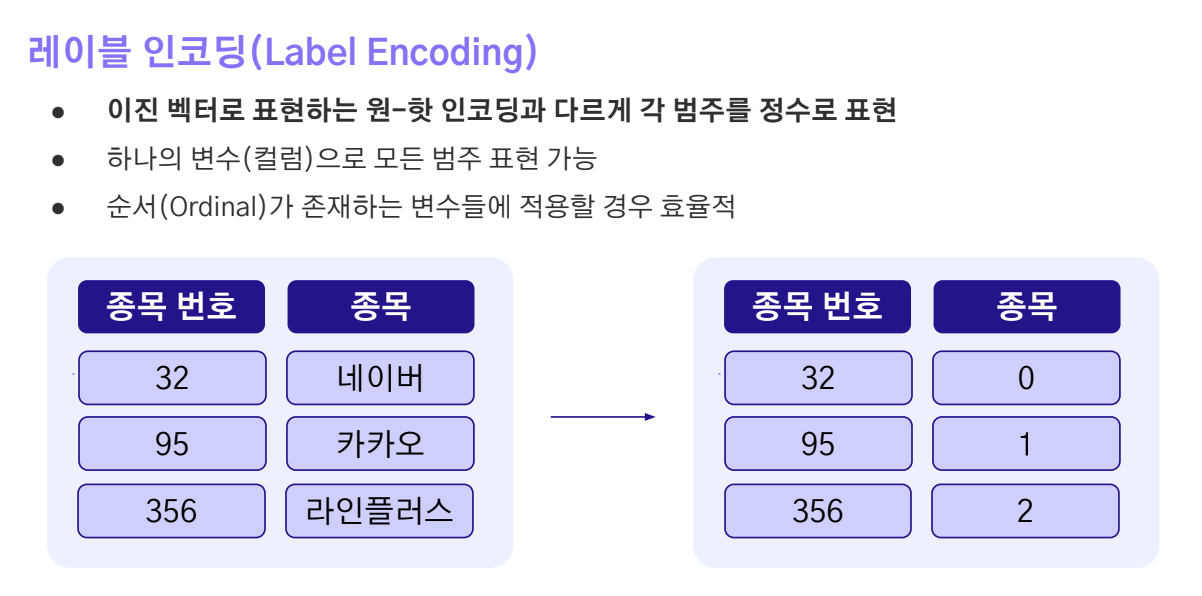

In [58]:
# ÌååÏÉùÎ≥ÄÏàò Ï†úÏûëÏúºÎ°ú Ï∂îÍ∞ÄÎêú Î≥ÄÏàòÎì§Ïù¥ Ï°¥Ïû¨ÌïòÍ∏∞Ïóê, Îã§ÏãúÌïúÎ≤à Ïó∞ÏÜçÌòïÍ≥º Î≤îÏ£ºÌòï ÏπºÎüºÏùÑ Î∂ÑÎ¶¨Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.
continuous_columns_v2 = []
categorical_columns_v2 = []

for column in dt_train.columns:
    if pd.api.types.is_numeric_dtype(dt_train[column]):
        continuous_columns_v2.append(column)
    else:
        categorical_columns_v2.append(column)

print("Ïó∞ÏÜçÌòï Î≥ÄÏàò:", continuous_columns_v2)
print("Î≤îÏ£ºÌòï Î≥ÄÏàò:", categorical_columns_v2)

Ïó∞ÏÜçÌòï Î≥ÄÏàò: ['Ï†ÑÏö©Î©¥Ï†Å', 'Í≥ÑÏïΩÏùº', 'Ï∏µ', 'Í±¥Ï∂ïÎÖÑÎèÑ', 'k-Ï†ÑÏ≤¥ÎèôÏàò', 'k-Ï†ÑÏ≤¥ÏÑ∏ÎåÄÏàò', 'k-Ïó∞Î©¥Ï†Å', 'k-Ï£ºÍ±∞Ï†ÑÏö©Î©¥Ï†Å', 'k-Í¥ÄÎ¶¨ÎπÑÎ∂ÄÍ≥ºÎ©¥Ï†Å', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°Ïù¥Ìïò)', 'k-Ï†ÑÏö©Î©¥Ï†ÅÎ≥ÑÏÑ∏ÎåÄÌòÑÌô©(60„é°~85„é°Ïù¥Ìïò)', 'k-85„é°~135„é°Ïù¥Ìïò', 'Í±¥Ï∂ïÎ©¥Ï†Å', 'Ï£ºÏ∞®ÎåÄÏàò', 'target', 'Í∞ïÎÇ®Ïó¨Î∂Ä', 'Í∞ÄÍ≤©ÏÉÅÏäπÎ•†', 'ÎèôÎì±Í∏â', 'Î∏åÎûúÎìúÎì±Í∏â', 'ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä', 'ÏßÄÌïòÏ≤†Í±∞Î¶¨', 'Í∏∞Ï§ÄÍ∏àÎ¶¨', 'Ïã†Ï∂ïÏó¨Î∂Ä']
Î≤îÏ£ºÌòï Î≥ÄÏàò: ['ÏïÑÌååÌä∏Î™Ö', 'ÎèÑÎ°úÎ™Ö', 'k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)', 'k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)', 'k-Í¥ÄÎ¶¨Î∞©Ïãù', 'k-Î≥µÎèÑÏú†Ìòï', 'k-ÎÇúÎ∞©Î∞©Ïãù', 'k-Í±¥ÏÑ§ÏÇ¨(ÏãúÍ≥µÏÇ¨)', 'k-ÏãúÌñâÏÇ¨', 'k-ÏÇ¨Ïö©Í≤ÄÏÇ¨Ïùº-ÏÇ¨Ïö©ÏäπÏù∏Ïùº', 'Í≤ΩÎπÑÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'ÏÑ∏ÎåÄÏ†ÑÍ∏∞Í≥ÑÏïΩÎ∞©Î≤ï', 'Ï≤≠ÏÜåÎπÑÍ¥ÄÎ¶¨ÌòïÌÉú', 'Í∏∞ÌÉÄ/ÏùòÎ¨¥/ÏûÑÎåÄ/ÏûÑÏùò=1/2/3/4', 'Îã®ÏßÄÏäπÏù∏Ïùº', 'Í¥ÄÎ¶¨ÎπÑ ÏóÖÎ°úÎìú', 'Îã®ÏßÄÏã†Ï≤≠Ïùº', 'Íµ¨', 'Îèô', 'Í≥ÑÏïΩÎÖÑ', 'Í≥ÑÏïΩÏõî', 'ÌèâÌòïÎåÄ', 'ÌïôÍµ∞']


In [59]:
# ÏïÑÎûòÏóêÏÑú Î≤îÏ£ºÌòï Î≥ÄÏàòÎì§ÏùÑ ÎåÄÏÉÅÏúºÎ°ú Î†àÏù¥Î∏îÏù∏ÏΩîÎî©ÏùÑ ÏßÑÌñâÌï¥ Ï£ºÍ≤†ÏäµÎãàÎã§.

# Í∞Å Î≥ÄÏàòÏóê ÎåÄÌïú LabelEncoderÎ•º Ï†ÄÏû•Ìï† ÎîïÏÖîÎÑàÎ¶¨
label_encoders = {}

# Implement Label Encoding
for col in tqdm( categorical_columns_v2 ):
    lbl = LabelEncoder()

    # Label-EncodingÏùÑ fit
    lbl.fit( dt_train[col].astype(str) )
    dt_train[col] = lbl.transform(dt_train[col].astype(str))
    label_encoders[col] = lbl           # ÎÇòÏ§ëÏóê ÌõÑÏ≤òÎ¶¨Î•º ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎçîÎ•º Ï†ÄÏû•Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

    # Test Îç∞Ïù¥ÌÑ∞ÏóêÎßå Ï°¥Ïû¨ÌïòÎäî ÏÉàÎ°ú Ï∂úÌòÑÌïú Îç∞Ïù¥ÌÑ∞Î•º Ïã†Í∑ú ÌÅ¥ÎûòÏä§Î°ú Ï∂îÍ∞ÄÌï¥Ï§çÎãàÎã§.
    for label in np.unique(dt_test[col]):
      if label not in lbl.classes_: # unseen label Îç∞Ïù¥ÌÑ∞Ïù∏ Í≤ΩÏö∞
        lbl.classes_ = np.append(lbl.classes_, label) # ÎØ∏Ï≤òÎ¶¨ Ïãú ValueErrorÎ∞úÏÉùÌïòÎãà Ï£ºÏùòÌïòÏÑ∏Ïöî!

    dt_test[col] = lbl.transform(dt_test[col].astype(str))

100%|‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà‚ñà| 23/23 [00:05<00:00,  3.84it/s]


In [60]:
dt_train.head(1)        # Î†àÏù¥Î∏îÏù∏ÏΩîÎî©Ïù¥ Îêú Î™®ÏäµÏûÖÎãàÎã§.

ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  k-Í¥ÄÎ¶¨Î∞©Ïãù  \
0   293  79.97    8  3  1987  5520                   3             2       2   

   k-Î≥µÎèÑÏú†Ìòï  ...  Í∞ïÎÇ®Ïó¨Î∂Ä  ÌèâÌòïÎåÄ     Í∞ÄÍ≤©ÏÉÅÏäπÎ•†  ÎèôÎì±Í∏â  Î∏åÎûúÎìúÎì±Í∏â  ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä  ÌïôÍµ∞    ÏßÄÌïòÏ≤†Í±∞Î¶¨  Í∏∞Ï§ÄÍ∏àÎ¶¨  \
0       1  ...     1    2  1.185023    1      2       2   9  0.80757   1.5   

   Ïã†Ï∂ïÏó¨Î∂Ä  
0     0  

[1 rows x 46 columns]

### 5.2. Model Training
- ÏúÑ Îç∞Ïù¥ÌÑ∞Î•º Ïù¥Ïö©Ìï¥ Î™®Îç∏ÏùÑ train Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§. Î™®Îç∏ÏùÄ XGBoost Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
- ÎßàÌÅ¨Îã§Ïö¥Ïóê RandomForestÍ¥ÄÎ†® ÏÇ¨Ìï≠ÏùÄ ÏÇ≠ÏÑ†ÌëúÏãúÌï¥ÎëêÏóàÏäµÎãàÎã§.

In [61]:
assert dt_train.shape[1] == dt_test.shape[1]          # train/test datasetÏùò shapeÏù¥ Í∞ôÏùÄÏßÄ ÌôïÏù∏Ìï¥Ï£ºÍ≤†ÏäµÎãàÎã§.

In [62]:
# TargetÍ≥º ÎèÖÎ¶ΩÎ≥ÄÏàòÎì§ÏùÑ Î∂ÑÎ¶¨Ìï¥Ï§çÎãàÎã§.
y_train = dt_train['target']
X_train = dt_train.drop(['target'], axis=1)

# Hold out splitÏùÑ ÏÇ¨Ïö©Ìï¥ ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ÏôÄ Í≤ÄÏ¶ù Îç∞Ïù¥ÌÑ∞Î•º 8:2 ÎπÑÏú®Î°ú ÎÇòÎàÑÍ≤†ÏäµÎãàÎã§.
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=2023)

In [63]:
import xgboost

model=xgboost.XGBRegressor(
    device='gpu'
)

### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÌÉêÏÉâÏùÑ ÏúÑÌïú ÏΩîÎìú

- GridSearchÏôÄ RandomSearch Ï§ë ÏÑ†ÌÉùÏùÑ Í≥†ÎØºÌñàÏäµÎãàÎã§
- GridSearchÎäî Î™®Îì† Í≤ΩÏö∞Ïùò ÏàòÎ•º Îî∞Ï†∏ÏÑú ÏãúÍ∞ÑÏù¥ ÎßéÏù¥ ÏÜåÏöîÎêòÎØÄÎ°ú RandomSearch Î•º ÏÑ†ÌÉùÌñàÏäµÎãàÎã§.
- ÏµúÏ†ÅÏùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ïù¥ÎØ∏ Ï∞æÏïÑ ÏïÑÎûò ÏΩîÎìúÏóêÏÑú ÏÇ¨Ïö©ÌïòÍ≥†ÏûàÏúºÎãà ÏïûÏúºÎ°ú Ïã§ÌñâÌï† ÌïÑÏöîÎäî ÏóÜÏäµÎãàÎã§.

In [64]:

# base_score=[0.25,0.5,0.7]

# n_estimators = [500, 1000, 1500, 2000]
# max_depth = [3, 5, 7, 10]
# booster=['gbtree']
# learning_rate=[0.01, 0.03, 0.05, 0.1]
# min_child_weight=[1, 5, 10]

# hyperparameter_grid = {
#     'n_estimators': n_estimators,
#     'max_depth':max_depth,
#     'learning_rate':learning_rate,
#     'min_child_weight':min_child_weight,
#     'booster':booster,
#     'base_score':base_score
#     }

# random_cv = RandomizedSearchCV(estimator=model,
#             param_distributions=hyperparameter_grid,
#             cv=5, n_iter=50,
#             scoring = 'neg_mean_absolute_error',n_jobs = -1,
#             verbose = 5, 
#             return_train_score = True,
#             random_state=42)


In [65]:
# random_cv.fit(X_train, y_train)

In [66]:
# random_cv.best_params_

In [67]:
# random_cv.best_score_

### ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏÑ†ÌÉùÏßÄÎì§

* ÌòÑÏû¨ÍπåÏßÄ ÌååÏïÖÎêú Ï†úÏùº Ï¢ãÏùÄ Ï†êÏàòÎ•º Î≥¥Ïù¥Îäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Îäî learningRate=0.05, n_estimator=5000 ÏûÖÎãàÎã§.
* ÌïòÏßÄÎßå n_estimatorÎ≥ÄÏàòÏùò Í∞íÏù¥ ÎÜíÏúºÎ©¥ Í≥ºÏ†ÅÌï© Ïö∞Î†§Í∞Ä ÏûàÏäµÎãàÎã§.
* Ï∂îÌõÑ EDAÍ∞Ä ÏôÑÎ£åÎêú ÌõÑ n_estimatorÍ∞íÏù¥ ÎÇÆÏùÄ Î™®Îç∏Î°úÎèÑ ÌïôÏäµ ÌõÑ ÌÖåÏä§Ìä∏Í∞Ä ÌïÑÏöîÌï©ÎãàÎã§.

Í∞Å ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î≥ÑÎ°ú ÏÉÅÎã®Ïóê Ï†êÏàòÎ•º Í∏∞Ïû¨Ìï¥ÎëêÏóàÏäµÎãàÎã§.


In [68]:
#44490
# n_estimatorsÍ∞Ä ÏûëÎã§
# EDAÍ∞Ä ÏôÑÎ£åÎêú ÌõÑ ÏïÑÎûò ÌååÎùºÎØ∏ÌÑ∞Î°úÎèÑ ÌïôÏäµ ÌõÑ ÌÖåÏä§Ìä∏Í∞Ä ÌïÑÏöîÏöî
# model=xgboost.XGBRegressor(
#  n_estimators= 900,
#  learning_rate= 0.15,
#  booster= 'gbtree',
#  device='cuda',
#  base_score= 0.25)
 
# 45045.5677
# model=xgboost.XGBRegressor(
#  n_estimators= 1500,
#  learning_rate= 0.1,
#  max_depth= 10,
#  min_child_weight= 1,
#  booster= 'gbtree',
#  device='cuda',
#  base_score= 0.5)

# 43815.4360
# RMSE test: 4280.667057047746
# model=xgboost.XGBRegressor(
#  n_estimators= 2000,
#  learning_rate= 0.05,
#  max_depth= 10,
#  min_child_weight= 5,
#  booster= 'gbtree',
#  device='cuda',
#  base_score= 0.5)

# 43752.7333
# RMSE test: 4226.164120555658
# model=xgboost.XGBRegressor(
#  n_estimators= 3000,
#  learning_rate= 0.05,
#  max_depth= 10,
#  min_child_weight= 5,
#  booster= 'gbtree',
#  device='cuda',
#  base_score= 0.5)

In [69]:
# ÌòÑÏû¨ÍπåÏßÄ Ï†úÏùº ÏÑ±Îä•Ïù¥ Ï¢ãÏùÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ ÏûÖÎãàÎã§.
# n_estimatorsÍ∞Ä ÍΩ§ ÌÅ∞Í∞íÏù¥Îùº Í≥ºÏ†ÅÌï© Ïö∞Î†§Í∞Ä ÏûàÏäµÎãàÎã§Îã§.
# EDAÍ∞Ä ÎÅùÎÇòÍ≥† n_estimatorÍ∞Ä ÏûëÏùÄ ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î°ú ÌïôÏäµÏùÑ ÏãúÌÇ§Í≥† Ï†êÏàòÎ•º ÎπÑÍµêÌï¥Î¥êÏïº Ìï©ÎãàÎã§.
# 43735.7052
# RMSE test: 4206.333504214999
model=xgboost.XGBRegressor(
 n_estimators= 500,
 learning_rate= 0.05,
 max_depth= 10,
 min_child_weight= 5,
 booster= 'gbtree',
 device='cuda',
 base_score= 0.5)

In [70]:
model.fit(X_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device='cuda', early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=10, max_leaves=None,
             min_child_weight=5, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [71]:
pred = model.predict(X_val)

~~- Ìè¨Î†àÏä§Ìä∏Ïùò ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞ÎèÑ Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÍ≤å ÏßÄÏ†ïÌï¥Ï§Ñ Ïàò ÏûàÏäµÎãàÎã§. Îç∞Ïù¥ÌÑ∞Ïóê ÎßûÎäî ÌïòÏù¥ÌçºÌååÎùºÎØ∏ÌÑ∞Î•º Ï∞æÎäî Í≤ÉÎèÑ ÏÑ±Îä• Ìñ•ÏÉÅÏóê ÎèÑÏõÄÏù¥ Îê† Ïàò ÏûàÏäµÎãàÎã§~~

In [72]:
# ÌöåÍ∑Ä Í¥ÄÎ†® metricÏùÑ ÌÜµÌï¥ train/validÏùò Î™®Îç∏ Ï†ÅÌï© Í≤∞Í≥ºÎ•º Í¥ÄÏ∞∞Ìï©ÎãàÎã§.
print(f'RMSE test: {np.sqrt(metrics.mean_squared_error(y_val, pred))}')

# n_estimators = 4000 : 1153.927997440971
# n_estimators = 3000 : 1152...
# n_estimators = 2000 : 1150.6300030243262
# n_estimators = 1000 : 1145.027811961602
# n_estimators = 500 : 1139.9269446802118       <<<<
    # learning_rate= 0.1 : 1143.8468634812389
    # learning_rate= 0.06 : 1139.4134303625754  <<<<
    # learning_rate= 0.05 : 1139.9269446802118
    # learning_rate= 0.01 : 1257.2375186511936
# n_estimators = 250 : 1144.567357701914


RMSE test: 1120.4012404718956


- Î≥ÄÏàò Ï§ëÏöîÎèÑÎèÑ ÌôïÏù∏Ìï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

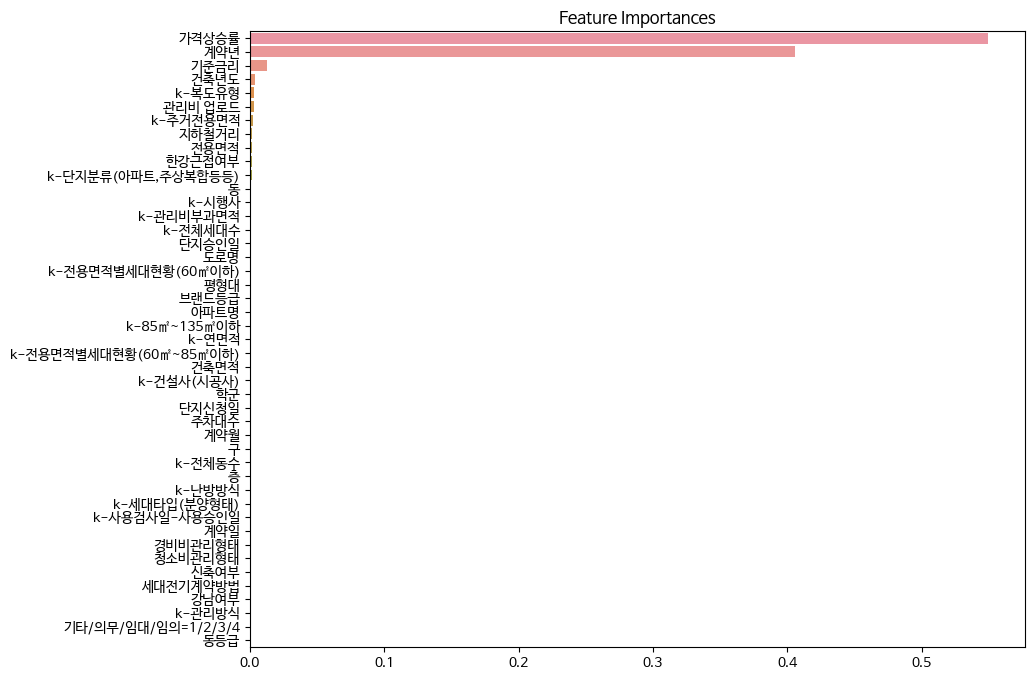

In [73]:
# ÏúÑ feature importanceÎ•º ÏãúÍ∞ÅÌôîÌï¥Î¥ÖÎãàÎã§.
importances = pd.Series(model.feature_importances_, index=list(X_train.columns))
importances = importances.sort_values(ascending=False)

plt.figure(figsize=(10,8))
plt.title("Feature Importances")
sns.barplot(x=importances, y=importances.index)
plt.show()

In [74]:
# ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§. Pickle ÎùºÏù¥Î∏åÎü¨Î¶¨Î•º Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
with open('saved_model.pkl', 'wb') as f:
    pickle.dump(model, f)

### 5.3. Feature selection

- Ïñ¥Îñ§ Î≥ÄÏàòÍ∞Ä Ïú†Ïö©Ìïú Î≥ÄÏàòÏù∏ÏßÄ ÌôïÏù∏Ìï¥Î≥¥Í∏∞ ÏúÑÌï¥ permutation selectionÏùÑ Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [75]:
# Permutation importance Î∞©Î≤ïÏùÑ Î≥ÄÏàò ÏÑ†ÌÉùÏóê Ïù¥Ïö©Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.
perm = PermutationImportance(model,        # ÏúÑÏóêÏÑú ÌïôÏäµÎêú Î™®Îç∏ÏùÑ Ïù¥Ïö©ÌïòÍ≤†ÏäµÎãàÎã§.
                             scoring = "neg_mean_squared_error",        # ÌèâÍ∞Ä ÏßÄÌëúÎ°úÎäî ÌöåÍ∑ÄÎ¨∏Ï†úÏù¥Í∏∞Ïóê negative rmseÎ•º ÏÇ¨Ïö©Ìï©ÎãàÎã§. (neg_mean_squared_error : ÏùåÏùò ÌèâÍ∑† Ï†úÍ≥± Ïò§Ï∞®)
                             random_state = 42,
                             n_iter=3).fit(X_val, y_val)
eli5.show_weights(perm, feature_names = X_val.columns.tolist(), top=len(X_val.columns))    # valid dataÏóê ÎåÄÌï¥ Ï†ÅÌï©ÏãúÌÇµÎãàÎã§.

- Î∂ÑÏÑù Í≤∞Í≥º "Í≥ÑÏïΩÎÖÑ", "Ï†ÑÏö©Î©¥Ï†Å" Î≥ÄÏàòÍ∞Ä Ïú†ÏùòÌïú Î≥ÄÏàòÎ°ú Î≥¥ÏûÖÎãàÎã§. Îî∞ÎùºÏÑú Ïù¥ Î≥ÄÏàòÎ°ú Îòê Îã§Î•∏ ÌååÏÉùÎ≥ÄÏàòÎ•º Îçî ÏÉùÏÑ±Ìï¥Î≥¥Í±∞ÎÇò, Ï§ëÏöîÎèÑÍ∞Ä ÎÇÆÏïÑÎ≥¥Ïù¥Îäî Î≥ÄÏàòÎ•º Ï†úÍ±∞Ìï¥ Ï∞®ÏõêÏùò Ï†ÄÏ£ºÎ•º ÎßâÏïÑÎ≥º ÏàòÎèÑ ÏûàÏäµÎãàÎã§.

### 5.4. Valid prediction Î∂ÑÏÑù

- ÏòàÏ∏°Í∞íÏùÑ Î∂ÑÏÑùÌï¥Î≥¥Í∏∞ ÏúÑÌï¥ valid predictionÏùÑ ÌôïÏù∏Ìï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [76]:
# Validation datasetÏóê targetÍ≥º pred Í∞íÏùÑ Ï±ÑÏõåÏ£ºÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.
X_val['target'] = y_val
X_val['pred'] = pred

In [77]:
# Squared_errorÎ•º Í≥ÑÏÇ∞ÌïòÎäî Ìï®ÏàòÎ•º Ï†ïÏùòÌïòÍ≤†ÏäµÎãàÎã§.
def calculate_se(target, pred):
    squared_errors = (target - pred) ** 2
    return squared_errors

# RMSE Í≥ÑÏÇ∞
squared_errors = calculate_se(X_val['target'], X_val['pred'])
X_val['error'] = squared_errors

In [78]:
# ErrorÍ∞Ä ÌÅ∞ ÏàúÏÑúÎåÄÎ°ú sorting Ìï¥ Î≥¥Í≤†ÏäµÎãàÎã§.
X_val_sort = X_val.sort_values(by='error', ascending=False)       # ÎÇ¥Î¶ºÏ∞®Ïàú sorting

In [79]:
X_val_sort.head()

ÏïÑÌååÌä∏Î™Ö    Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  \
215363   575  117.11   17   3  1984  3934                   0             0   
215883  2773  108.93   17  27  2018   609                   3             1   
215367  1557   84.95    1  26  2023     0                   0             0   
3604    5372  121.32    4  12  1977  5233                   0             0   
441076   300   61.57   18   3  1982  4426                   3             2   

        k-Í¥ÄÎ¶¨Î∞©Ïãù  k-Î≥µÎèÑÏú†Ìòï  ...  ÎèôÎì±Í∏â  Î∏åÎûúÎìúÎì±Í∏â  ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä  ÌïôÍµ∞     ÏßÄÌïòÏ≤†Í±∞Î¶¨  Í∏∞Ï§ÄÍ∏àÎ¶¨  Ïã†Ï∂ïÏó¨Î∂Ä  \
215363       0       0  ...    1      2       1   9  0.554552  3.50     0   
215883       1       5  ...    1      1       2   0  0.588393  3.50     1   
215367       0       0  ...    1      1       1   9  0.556594  3.50     1   
3604         0       0  ...    1      2       2   9  0.738040  1.50     0   
441076       2       1  ...    1      2       2   9  0.803183  1.25     0   

          target           pred         error  
215363  243000.0  366170.343750  1.517093e+10  
215883  239000.0  339014.375000  1.000288e+10  
215367  360000.0  262996.875000  9.409606e+09  
3604    245000.0  324998.531250  6.399765e+09  
441076  260000.0  185799.328125  5.505740e+09  

[5 rows x 48 columns]

- ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄ Î™ªÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞ÏôÄ ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò Îç∞Ïù¥ÌÑ∞Î•º ÎπÑÍµêÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

In [80]:
X_val_sort_top100 = X_val.sort_values(by='error', ascending=False).head(100)        # ÏòàÏ∏°ÏùÑ Ïûò ÌïòÏßÄÎ™ªÌïú top 100Í∞úÏùò data
X_val_sort_tail100 = X_val.sort_values(by='error', ascending=False).tail(100)       # ÏòàÏ∏°ÏùÑ ÏûòÌïú top 100Í∞úÏùò data

In [81]:
# Ìï¥ÏÑùÏùÑ ÏúÑÌï¥ Î†àÏù¥Î∏îÏù∏ÏΩîÎî© Îêú Î≥ÄÏàòÎ•º Î≥µÏõêÌï¥Ï§çÎãàÎã§.
error_top100 = X_val_sort_top100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    error_top100[column] = label_encoders[column].inverse_transform(X_val_sort_top100[column])

best_top100 = X_val_sort_tail100.copy()
for column in categorical_columns_v2 :     # ÏïûÏÑú Î†àÏù¥Î∏î Ïù∏ÏΩîÎî©ÏóêÏÑú Ï†ïÏùòÌñàÎçò categorical_columns_v2 Î≤îÏ£ºÌòï Î≥ÄÏàò Î¶¨Ïä§Ìä∏Î•º ÏÇ¨Ïö©Ìï©ÎãàÎã§.
    best_top100[column] = label_encoders[column].inverse_transform(X_val_sort_tail100[column])

In [82]:
display(error_top100.head(5))
display(best_top100.head(1))

ÏïÑÌååÌä∏Î™Ö    Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ        ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
215363        Í∂ÅÏ†Ñ  117.11   17   3  1984   ÏÇ¨ÌèâÎåÄÎ°ú 142               NULL   
215883  ÏÑúÏö∏Ïà≤Î¶¨Î≤ÑÎ∑∞ÏûêÏù¥  108.93   17  27  2018  Í≥†ÏÇ∞ÏûêÎ°ú2Í∏∏ 65                ÏïÑÌååÌä∏   
215367   ÎûòÎØ∏ÏïàÏõêÎ≤†ÏùºÎ¶¨   84.95    1  26  2023                          NULL   
3604        ÌïúÏñë1Ï∞®  121.32    4  12  1977   ÏïïÍµ¨Ï†ïÎ°ú 321               NULL   
441076   Í∞úÌè¨Ï£ºÍ≥µ1Îã®ÏßÄ   61.57   18   3  1982      ÏÑ†Î¶âÎ°ú 7                ÏïÑÌååÌä∏   

       k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï  ... ÎèôÎì±Í∏â  Î∏åÎûúÎìúÎì±Í∏â  ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä    ÌïôÍµ∞     ÏßÄÌïòÏ≤†Í±∞Î¶¨  \
215363         NULL   NULL   NULL  ...   1      2       1   8ÌïôÍµ∞  0.554552   
215883           Í∏∞ÌÉÄ   ÏúÑÌÉÅÍ¥ÄÎ¶¨    ÌòºÌï©Ïãù  ...   1      1       2  10ÌïôÍµ∞  0.588393   
215367         NULL   NULL   NULL  ...   1      1       1   8ÌïôÍµ∞  0.556594   
3604           NULL   NULL   NULL  ...   1      2       2   8ÌïôÍµ∞  0.738040   
441076           Î∂ÑÏñë   ÏûêÏπòÍ¥ÄÎ¶¨    Í≥ÑÎã®Ïãù  ...   1      2       2   8ÌïôÍµ∞  0.803183   

        Í∏∞Ï§ÄÍ∏àÎ¶¨  Ïã†Ï∂ïÏó¨Î∂Ä    target           pred         error  
215363  3.50     0  243000.0  366170.343750  1.517093e+10  
215883  3.50     1  239000.0  339014.375000  1.000288e+10  
215367  3.50     1  360000.0  262996.875000  9.409606e+09  
3604    1.50     0  245000.0  324998.531250  6.399765e+09  
441076  1.25     0  260000.0  185799.328125  5.505740e+09  

[5 rows x 48 columns]

ÏïÑÌååÌä∏Î™Ö   Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº  Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ          ÎèÑÎ°úÎ™Ö k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  \
580492  ÏùÄÎπõ2Îã®ÏßÄ  49.77    9  2  1998  ÎèôÏùºÎ°ú245Í∞ÄÍ∏∏ 41               NULL   

       k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú) k-Í¥ÄÎ¶¨Î∞©Ïãù k-Î≥µÎèÑÏú†Ìòï  ... ÎèôÎì±Í∏â  Î∏åÎûúÎìúÎì±Í∏â  ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä   ÌïôÍµ∞     ÏßÄÌïòÏ≤†Í±∞Î¶¨ Í∏∞Ï§ÄÍ∏àÎ¶¨  \
580492         NULL   NULL   NULL  ...   2      2       2  4ÌïôÍµ∞  0.450393  1.5   

        Ïã†Ï∂ïÏó¨Î∂Ä   target          pred     error  
580492     0  23400.0  23400.035156  0.001236  

[1 rows x 48 columns]

- Ïù¥Ï†ú Î∂ÑÌè¨Î•º ÎπÑÍµêÌï¥Î≥¥ÎèÑÎ°ù ÌïòÍ≤†ÏäµÎãàÎã§.

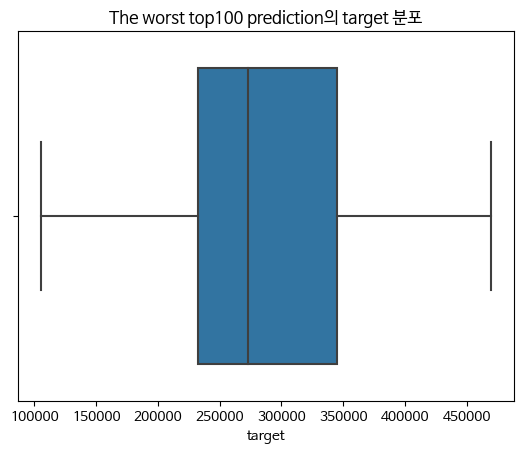

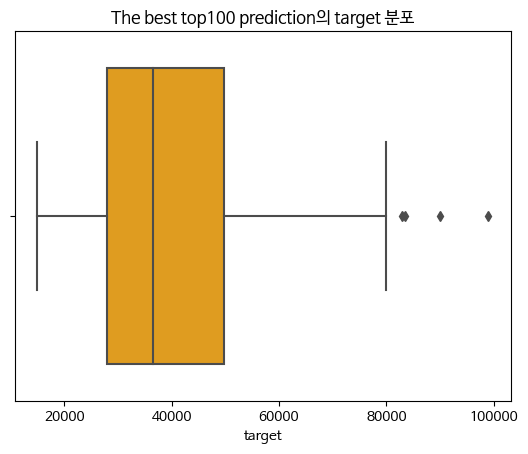

In [83]:
sns.boxplot(data = error_top100, x='target')
plt.title('The worst top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

sns.boxplot(data = best_top100, x='target', color='orange')
plt.title('The best top100 predictionÏùò target Î∂ÑÌè¨')
plt.show()

- Taget Î∂ÑÌè¨Î•º Î≥¥Îãà Ï¢ãÏùÄ ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100Í∞úÏùò dataÎ≥¥Îã§ ÏÉÅÎåÄÏ†ÅÏúºÎ°ú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ top 100 datasetÎì§Ïù¥ ÎÜíÏùÄ Í∞ÄÍ≤©ÏùÑ Î≥¥ÏòÄÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§. Ïù¥Ïóê ÎåÄÌïú Î™®Îç∏ÎßÅ Î∞è Ï≤òÎ¶¨Í∞Ä ÌïÑÏöîÌï¥Î≥¥ÏûÖÎãàÎã§.

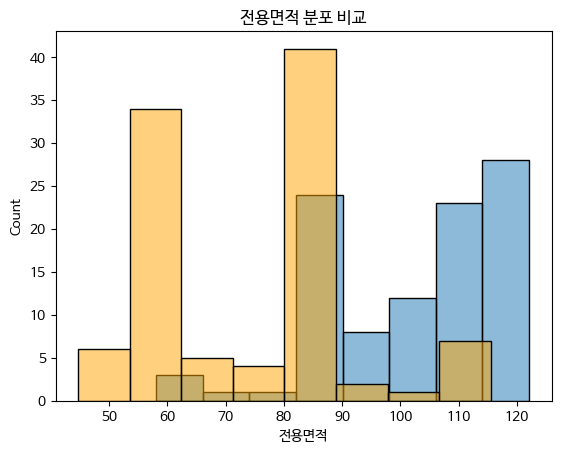

In [84]:
sns.histplot(data = error_top100, x='Ï†ÑÏö©Î©¥Ï†Å', alpha=0.5)
sns.histplot(data = best_top100, x='Ï†ÑÏö©Î©¥Ï†Å', color='orange', alpha=0.5)
plt.title('Ï†ÑÏö©Î©¥Ï†Å Î∂ÑÌè¨ ÎπÑÍµê')
plt.show()

- Ï†ÑÏö©Î©¥Ï†Å ÎòêÌïú ÎÇòÏÅú ÏòàÏ∏°ÏùÑ Î≥¥Ïù∏ ÏßëÎì§Ïù¥ Îçî ÎÑìÏùåÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

## 6. Inference

In [85]:
dt_test.head(2)      # test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï¥Î≥¥Í≤†ÏäµÎãàÎã§.

ÏïÑÌååÌä∏Î™Ö      Ï†ÑÏö©Î©¥Ï†Å  Í≥ÑÏïΩÏùº   Ï∏µ  Í±¥Ï∂ïÎÖÑÎèÑ   ÎèÑÎ°úÎ™Ö  k-Îã®ÏßÄÎ∂ÑÎ•ò(ÏïÑÌååÌä∏,Ï£ºÏÉÅÎ≥µÌï©Îì±Îì±)  k-ÏÑ∏ÎåÄÌÉÄÏûÖ(Î∂ÑÏñëÌòïÌÉú)  \
0   293   79.9700   26   5  1987  5520                   3             2   
1   294  108.2017   15  10  2021   431                   3             2   

   k-Í¥ÄÎ¶¨Î∞©Ïãù  k-Î≥µÎèÑÏú†Ìòï  ...  Í∞ïÎÇ®Ïó¨Î∂Ä  ÌèâÌòïÎåÄ     Í∞ÄÍ≤©ÏÉÅÏäπÎ•†  ÎèôÎì±Í∏â  Î∏åÎûúÎìúÎì±Í∏â  ÌïúÍ∞ïÍ∑ºÏ†ëÏó¨Î∂Ä  ÌïôÍµ∞     ÏßÄÌïòÏ≤†Í±∞Î¶¨  \
0       2       1  ...     1    2 -0.806003    1      2       2   9  0.807570   
1       1       1  ...     1    0 -0.806003    1      1       2   9  0.787231   

   Í∏∞Ï§ÄÍ∏àÎ¶¨  Ïã†Ï∂ïÏó¨Î∂Ä  
0   3.5     0  
1   3.5     1  

[2 rows x 46 columns]

In [86]:
# Ï†ÄÏû•Îêú Î™®Îç∏ÏùÑ Î∂àÎü¨ÏòµÎãàÎã§.
with open('saved_model.pkl', 'rb') as f:
    model = pickle.load(f)

In [87]:
%%time
X_test = dt_test.drop(['target'], axis=1)

# Test datasetÏóê ÎåÄÌïú inferenceÎ•º ÏßÑÌñâÌï©ÎãàÎã§.
real_test_pred = model.predict(X_test)

CPU times: user 135 ms, sys: 5.97 ms, total: 141 ms
Wall time: 30.1 ms


In [88]:
real_test_pred          # ÏòàÏ∏°Í∞íÎì§Ïù¥ Ï∂úÎ†•Îê®ÏùÑ ÌôïÏù∏Ìï† Ïàò ÏûàÏäµÎãàÎã§.

array([18226.998, 17387.768, 18029.725, ..., 17161.174, 16950.81 ,
       17153.701], dtype=float32)

## 7. Output File Save

In [89]:
# ÏïûÏÑú ÏòàÏ∏°Ìïú ÏòàÏ∏°Í∞íÎì§ÏùÑ Ï†ÄÏû•Ìï©ÎãàÎã§.
preds_df = pd.DataFrame(real_test_pred.astype(int), columns=["target"])
preds_df.to_csv('output.csv', index=False)